In [1]:
import numpy as np
import pandas as pd
import sys
import pickle
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.append('../scripts/')
from lib.shape_utils import *

In [28]:
data,count = pickle.load(open('/Users/kuiqian/Downloads/VQ.pkl','rb'))


In [3]:
vq = pickle.load(open('/Users/kuiqian/Downloads/VQ15.pkl','rb'))
data,count = vq[15]

In [4]:
def dist2(a,b):
    h = max(a.shape[0], b.shape[0])
    w = max(a.shape[1], b.shape[1])
    
    a_pad = np.zeros([h, w], dtype=a.dtype)
    _x = int((h - a.shape[0]) / 2)
    _y = int((w - a.shape[1]) / 2)
    a_pad[_x:_x+a.shape[0], _y:_y+a.shape[1]] = a
    
    b_pad = np.zeros([h, w], dtype=b.dtype)
    _x = int((h - b.shape[0]) / 2)
    _y = int((w - b.shape[1]) / 2)
    b_pad[_x:_x + b.shape[0], _y:_y + b.shape[1]] = b
    diff=(a_pad-b_pad)**2
    return np.sqrt(sum(diff.flatten()))

In [5]:
def distance_matrix(nodes):
    graph = []
    for i in range(len(nodes)):
        node = nodes[i]
        dists=[dist2(node,r) for r in nodes]
#         threshold = np.sort(dists)[n_neighbors]
#         neighbors = (dists<=threshold)*1
#         neighbors[i] = 0
        graph.append(dists)
    graph = np.array(graph)
#     graph = np.sqrt(graph.T*graph)
    return graph

In [6]:
from sklearn.neighbors import NearestNeighbors

In [6]:
neighbor_params = {'n_jobs': -1, 'algorithm': 'brute'}

In [29]:
len(data)

2113

In [32]:
image_size=np.unique([max(pic.shape) for pic in data])

In [33]:
image_size

array([ 15,  51, 201])

In [9]:
%%time
ds = distance_matrix(data)

CPU times: user 3min 47s, sys: 4.49 s, total: 3min 52s
Wall time: 3min 52s


In [10]:
ds.max()

157.24359

In [24]:
values = [list(ds[i,i+1:]) for i in range(ds.shape[0]-1)]

In [26]:
len(sum(values))

2231328

CPU times: user 17.3 s, sys: 7.99 s, total: 25.3 s
Wall time: 25.3 s


(array([376504., 797622., 523987., 209702., 149409.,  90760.,  40911.,
         22430.,  12016.,   7987.]),
 array([  2.1348257,  17.645702 ,  33.156578 ,  48.667454 ,  64.17833  ,
         79.68921  ,  95.20009  , 110.71096  , 126.22184  , 141.73271  ,
        157.24359  ], dtype=float32),
 <a list of 10 Patch objects>)

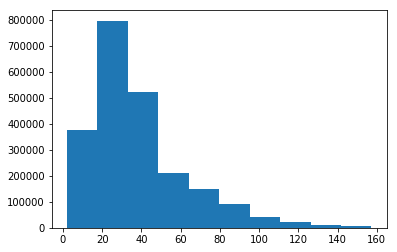

In [27]:
%%time
hist(sum(values))

In [38]:
%%time
distance_matrix(data).max()

CPU times: user 5.09 s, sys: 87.1 ms, total: 5.18 s
Wall time: 5.28 s


1085.6260866430946

In [35]:
%%time
distance_matrix(data).max()

CPU times: user 31.2 s, sys: 202 ms, total: 31.4 s
Wall time: 32 s


16.2680765947425

In [8]:
neigh = NearestNeighbors(n_neighbors=100,metric='precomputed',**neighbor_params)


In [12]:
%%time
neigh.fit(distance_matrix(data))


CPU times: user 29.5 s, sys: 200 ms, total: 29.7 s
Wall time: 30.1 s


NearestNeighbors(algorithm='brute', leaf_size=30, metric='precomputed',
         metric_params=None, n_jobs=-1, n_neighbors=100, p=2, radius=1.0)

In [13]:
A = neigh.kneighbors_graph(distance_matrix(data))
a = A.toarray()

/Users/kuiqian/Github/venv/shapeology_venv/lib/python3.7/site-packages/sklearn/neighbors/base.py:452: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.vstack(result)


In [14]:
neigh = NearestNeighbors(n_neighbors=100,metric='euclidean',**neighbor_params)

In [15]:
%%time
neigh.fit(data1D)

CPU times: user 2.39 ms, sys: 725 µs, total: 3.11 ms
Wall time: 2.02 ms


NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=-1, n_neighbors=100, p=2, radius=1.0)

In [16]:
B = neigh.kneighbors_graph(data1D)
b = B.toarray()

/Users/kuiqian/Github/venv/shapeology_venv/lib/python3.7/site-packages/sklearn/neighbors/base.py:452: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.vstack(result)


In [62]:
i = 5
sum(data1D[i].reshape([size,-1])-data[i])

-0.0031573653221124713

In [19]:
sum(a-b)

0.0

In [18]:
b

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
nbrs = NearestNeighbors(n_neighbors=100, algorithm='ball_tree', metric=dist2)


In [7]:
sys.path.append('../production/cell_extraction/VQ&diffusionmap/pydiffmap/')
import diffusion_map as dm


In [29]:
data = pickle.load(open('/Users/kuiqian/Downloads/VQ0.pkl','rb'))


In [ ]:
%%time
mydmap = dm.DiffusionMap.from_sklearn(n_evecs=100, k=100, metric='precomputed',epsilon=2500, alpha=1.0, neighbor_params=neighbor_params)
dmap = mydmap.fit_transform(data)

In [32]:
def scatter_plots(pics,dmap,d1=0,d2=1,canvas_sz=1000):
    canvas_size=np.array([canvas_sz,canvas_sz])
    _minx=min(dmap[:,d1])
    _maxx=max(dmap[:,d1])
    _miny=min(dmap[:,d2])
    _maxy=max(dmap[:,d2])
    shift_x = -_minx
    scale_x = canvas_size[0]/(_maxx - _minx)
    shift_y = -_miny
    scale_y = canvas_size[1]/(_maxy - _miny)

    x=[int((_x+shift_x)*scale_x) for _x in dmap[:,d1]]
    y=[int((_y+shift_y)*scale_y) for _y in dmap[:,d2]]
    
    image_size=max([max(pic.shape) for pic in pics])
    canvas_size = list(canvas_size+image_size)
    canvas = np.zeros(canvas_size, dtype='uint8')
    for i in range(len(pics)):
        gray = pics[i].copy()
        gray = np.uint8(gray/gray.max()*255)
        left = x[i]
        up = y[i]
        origin = canvas[left:left+gray.shape[0],up:up+gray.shape[1]]
        canvas[left:left+gray.shape[0],up:up+gray.shape[1]] = np.maximum(origin,gray)
    return 255-canvas

CPU times: user 2.24 s, sys: 168 ms, total: 2.4 s
Wall time: 2.55 s


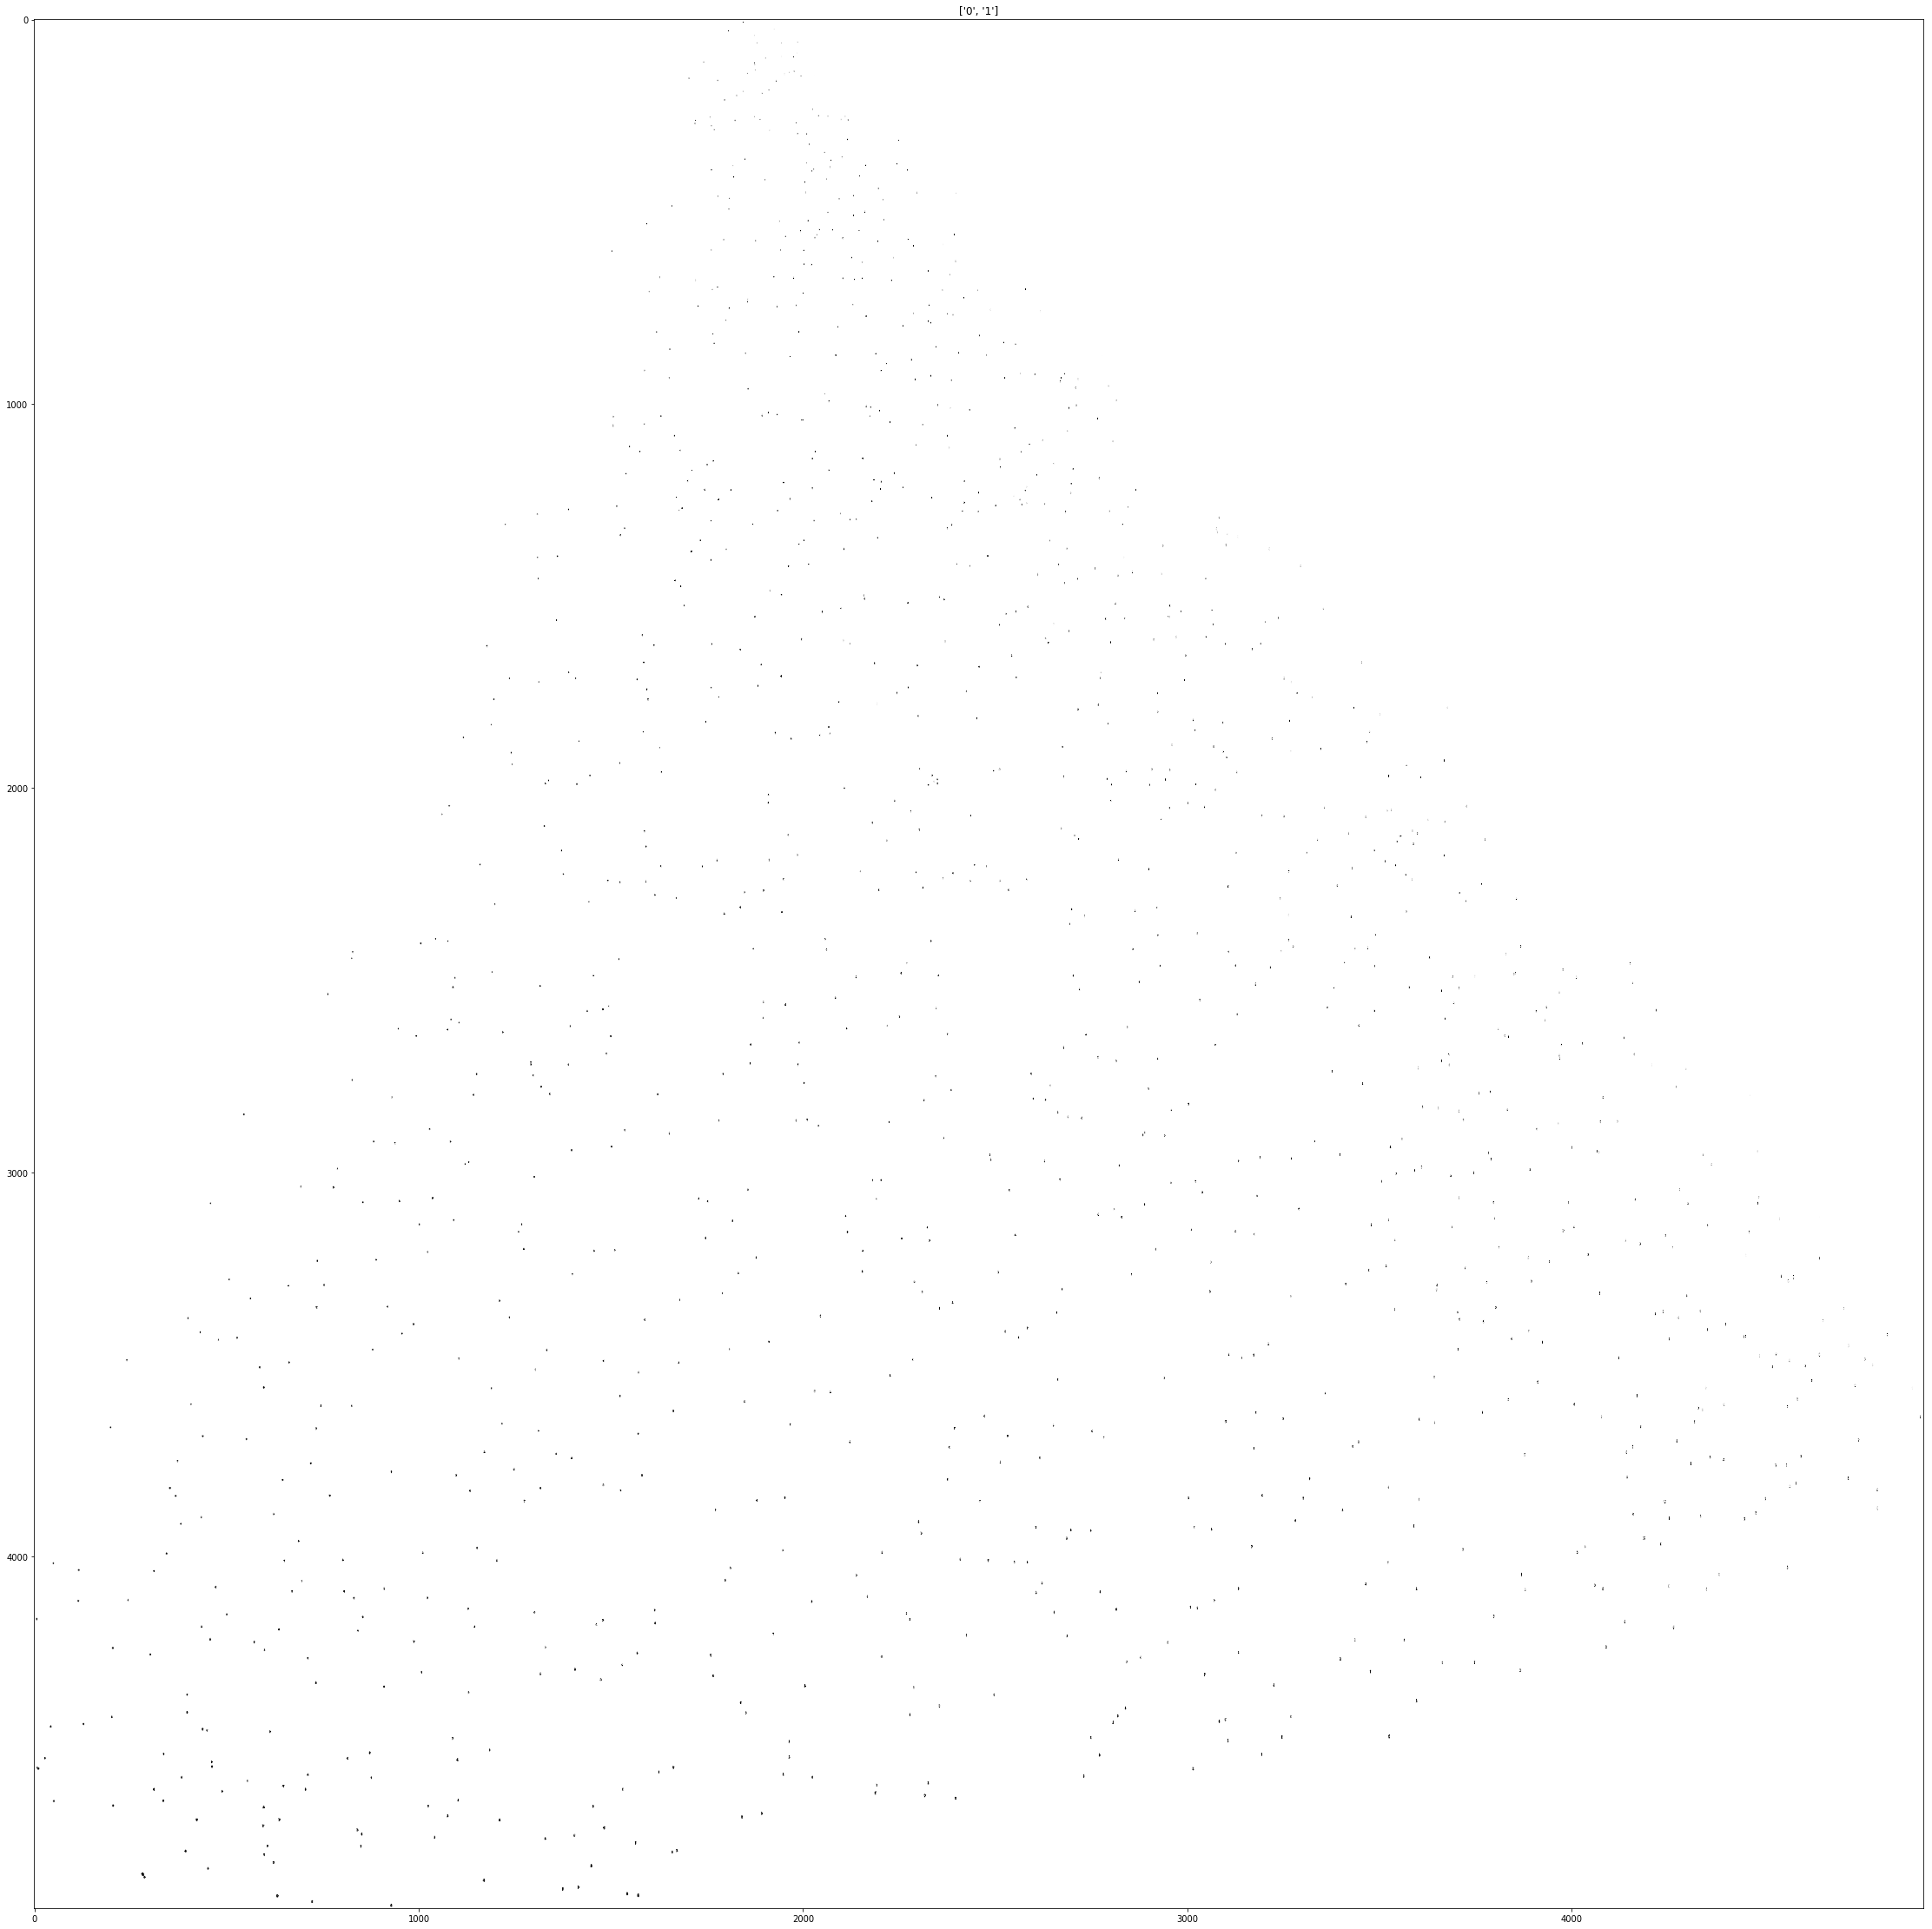

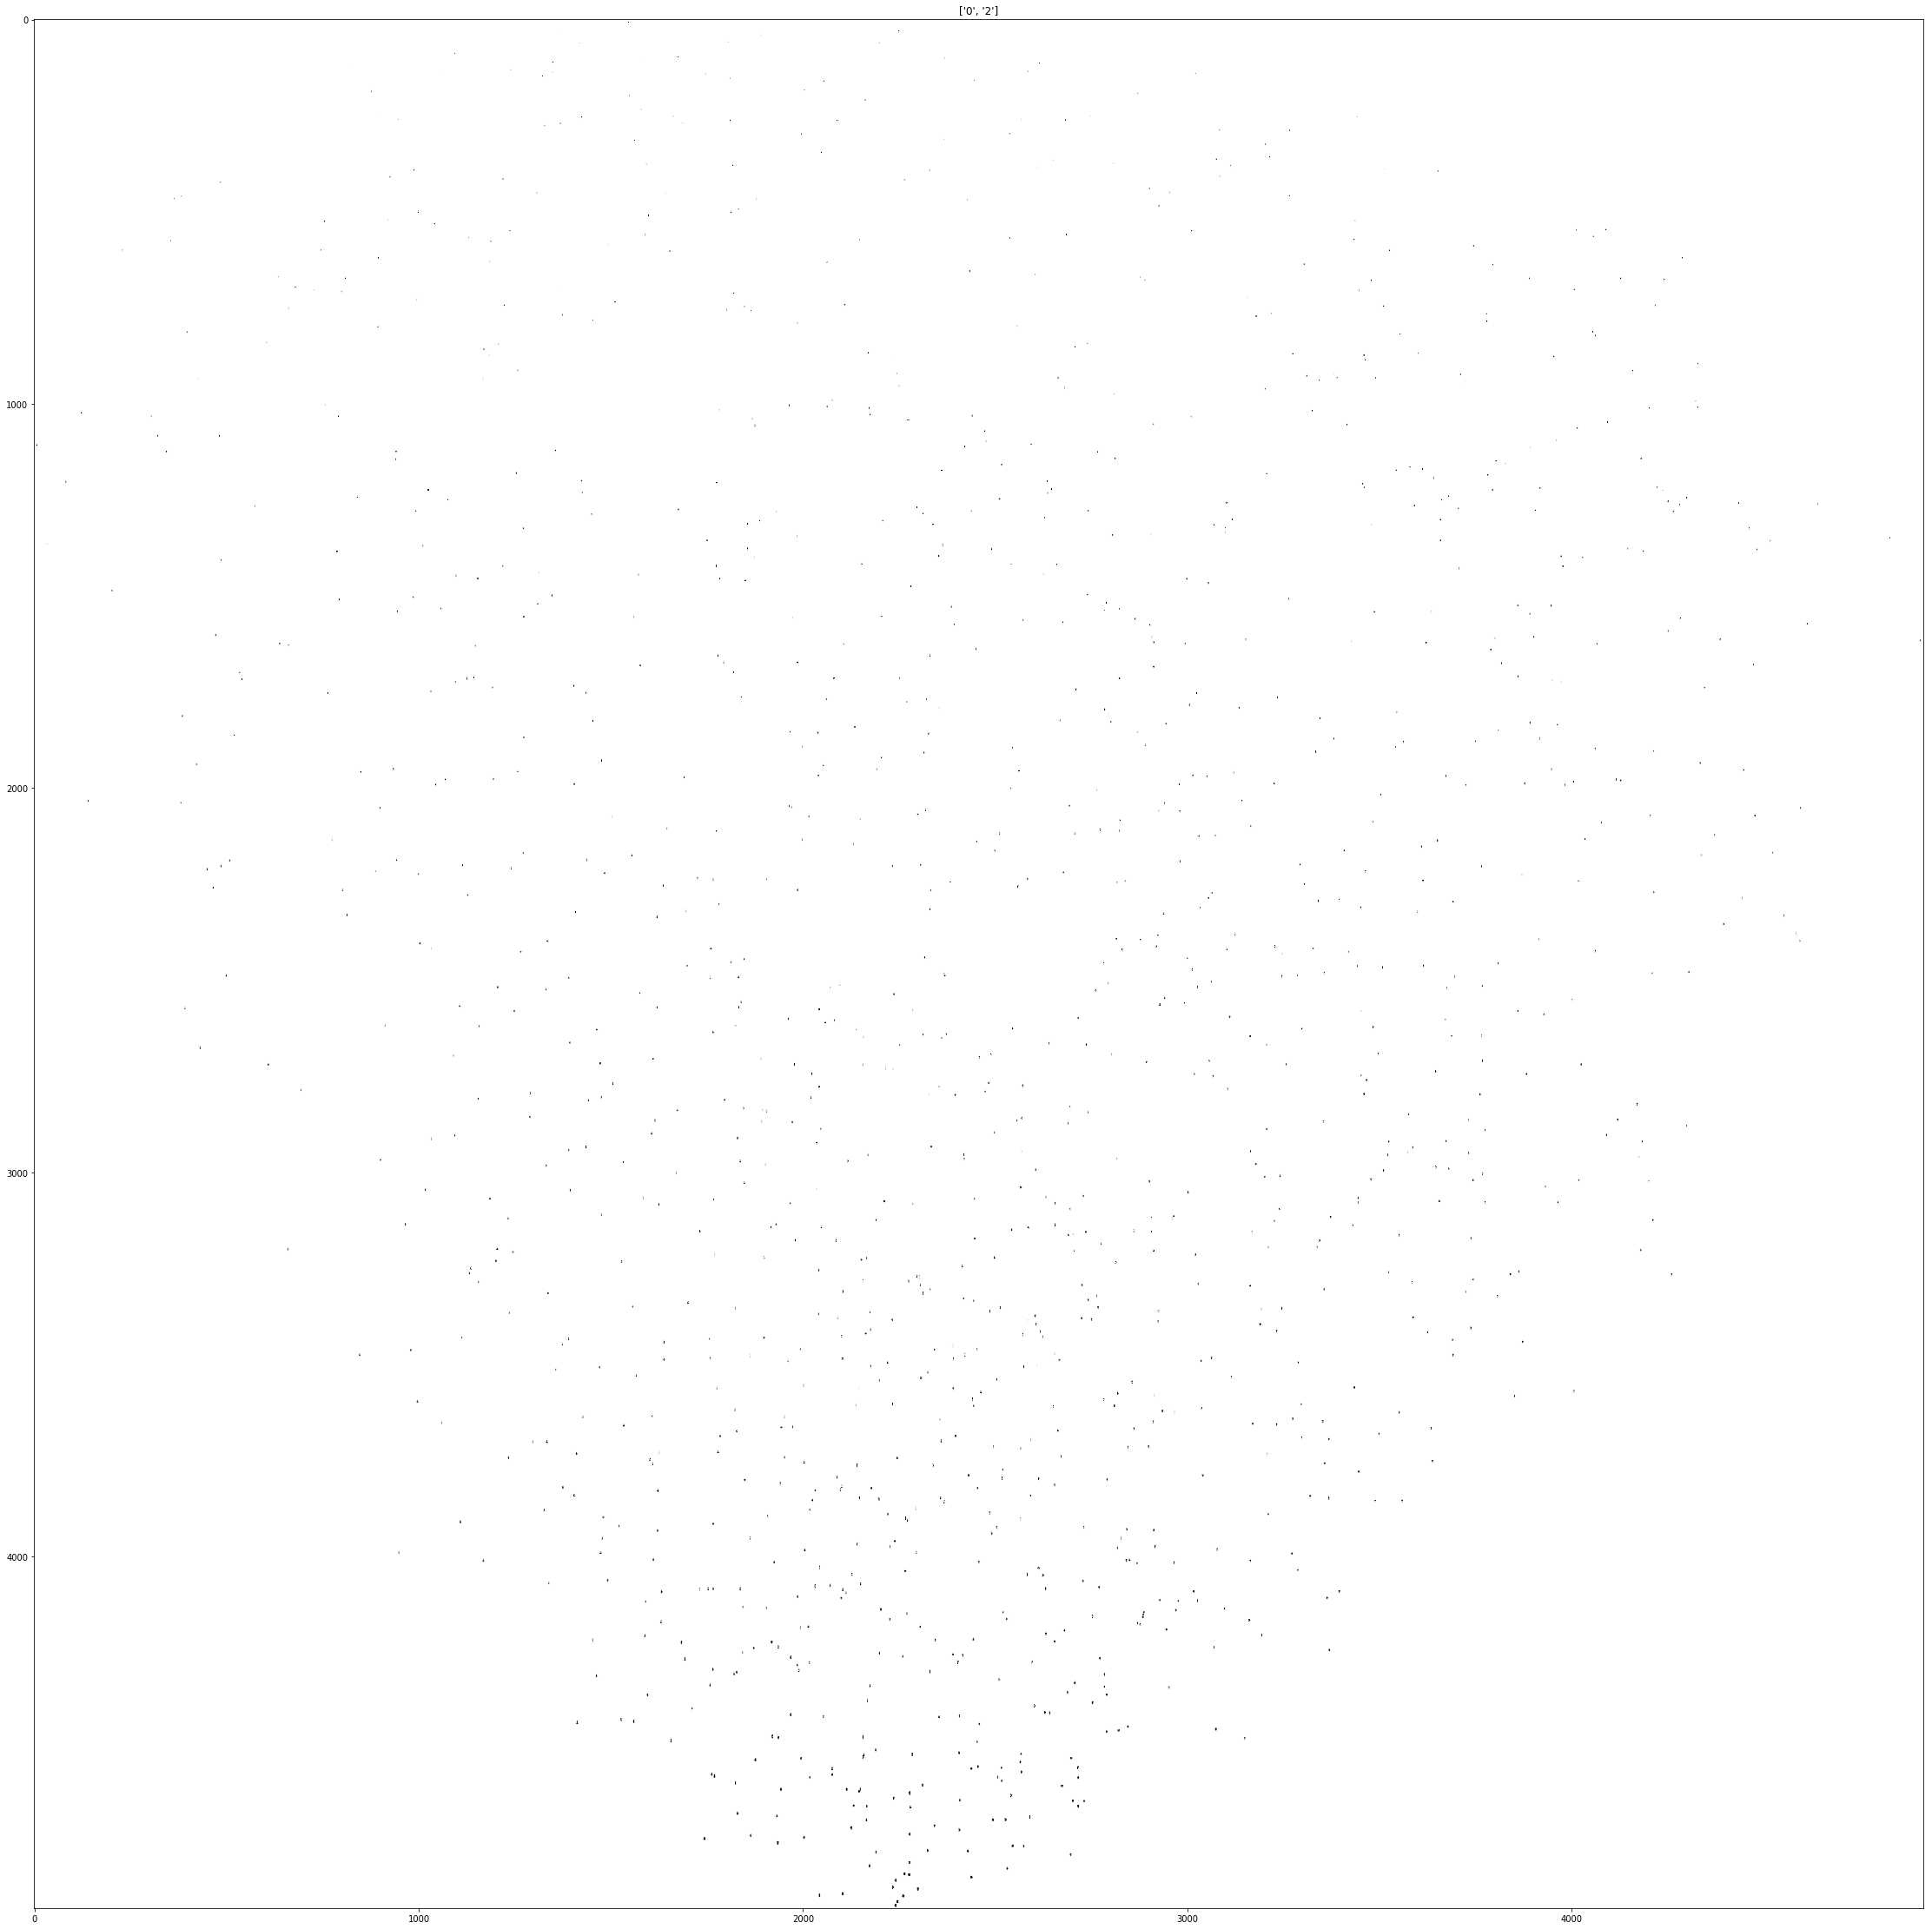

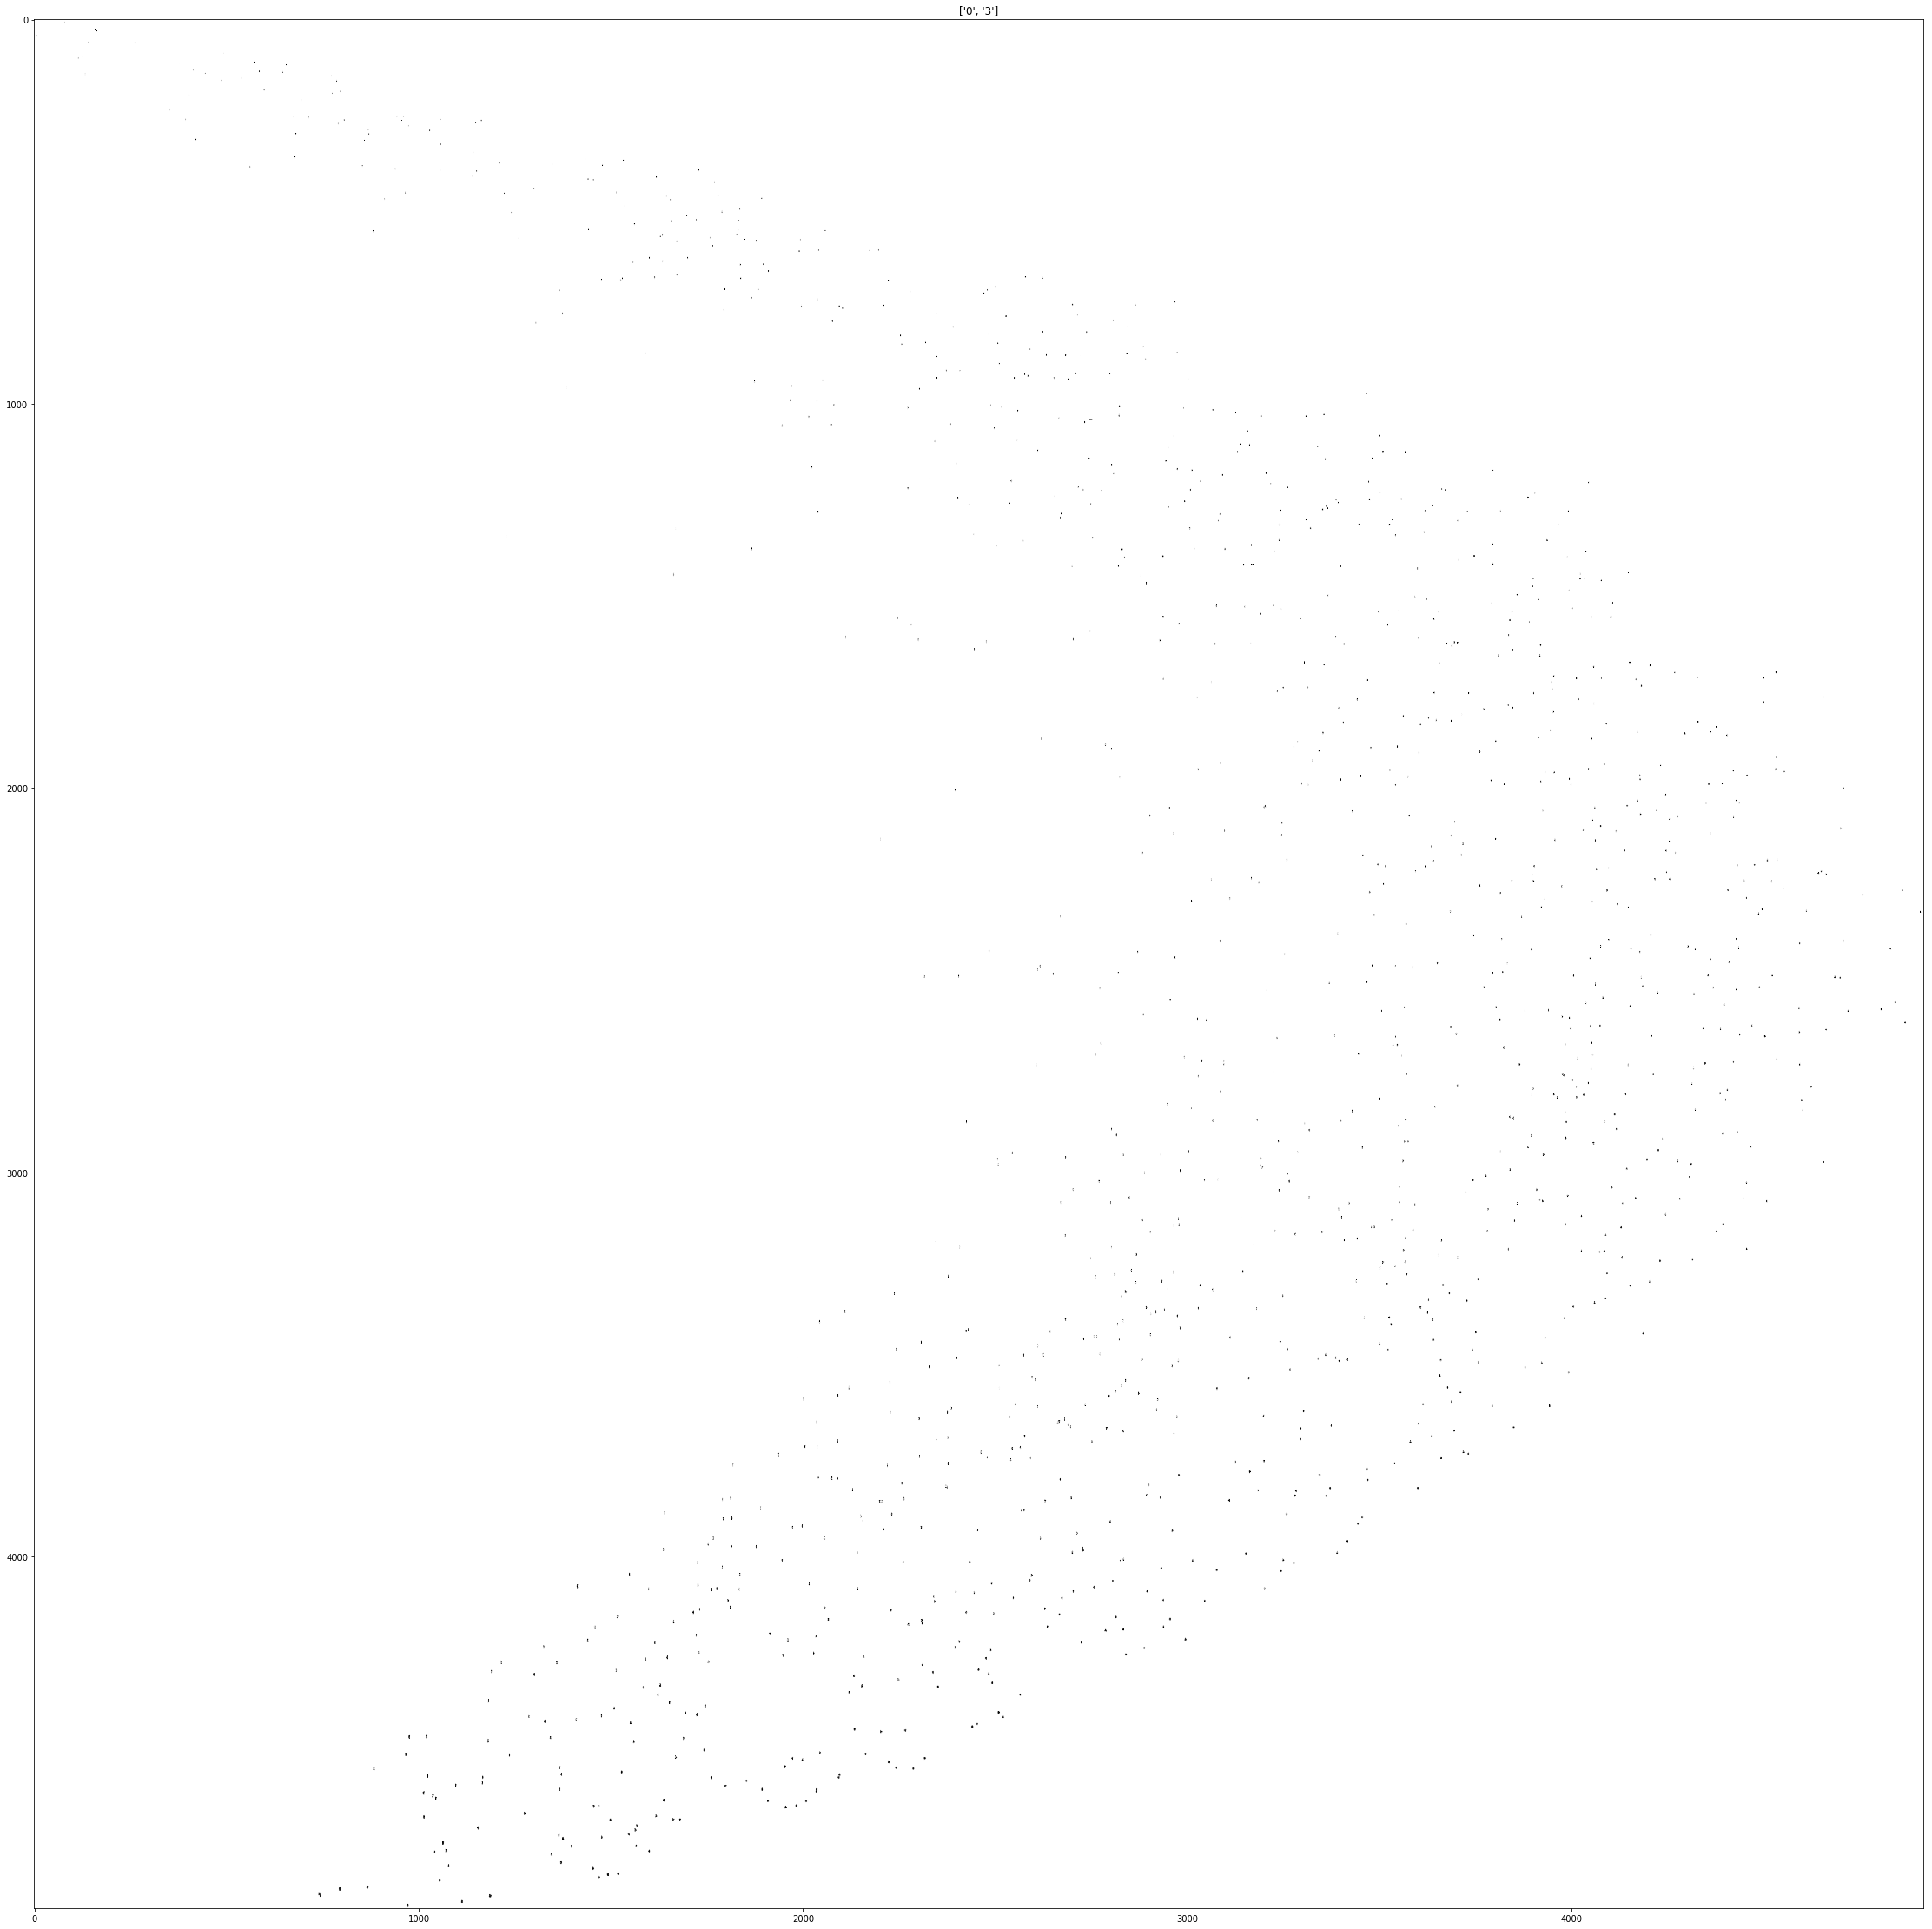

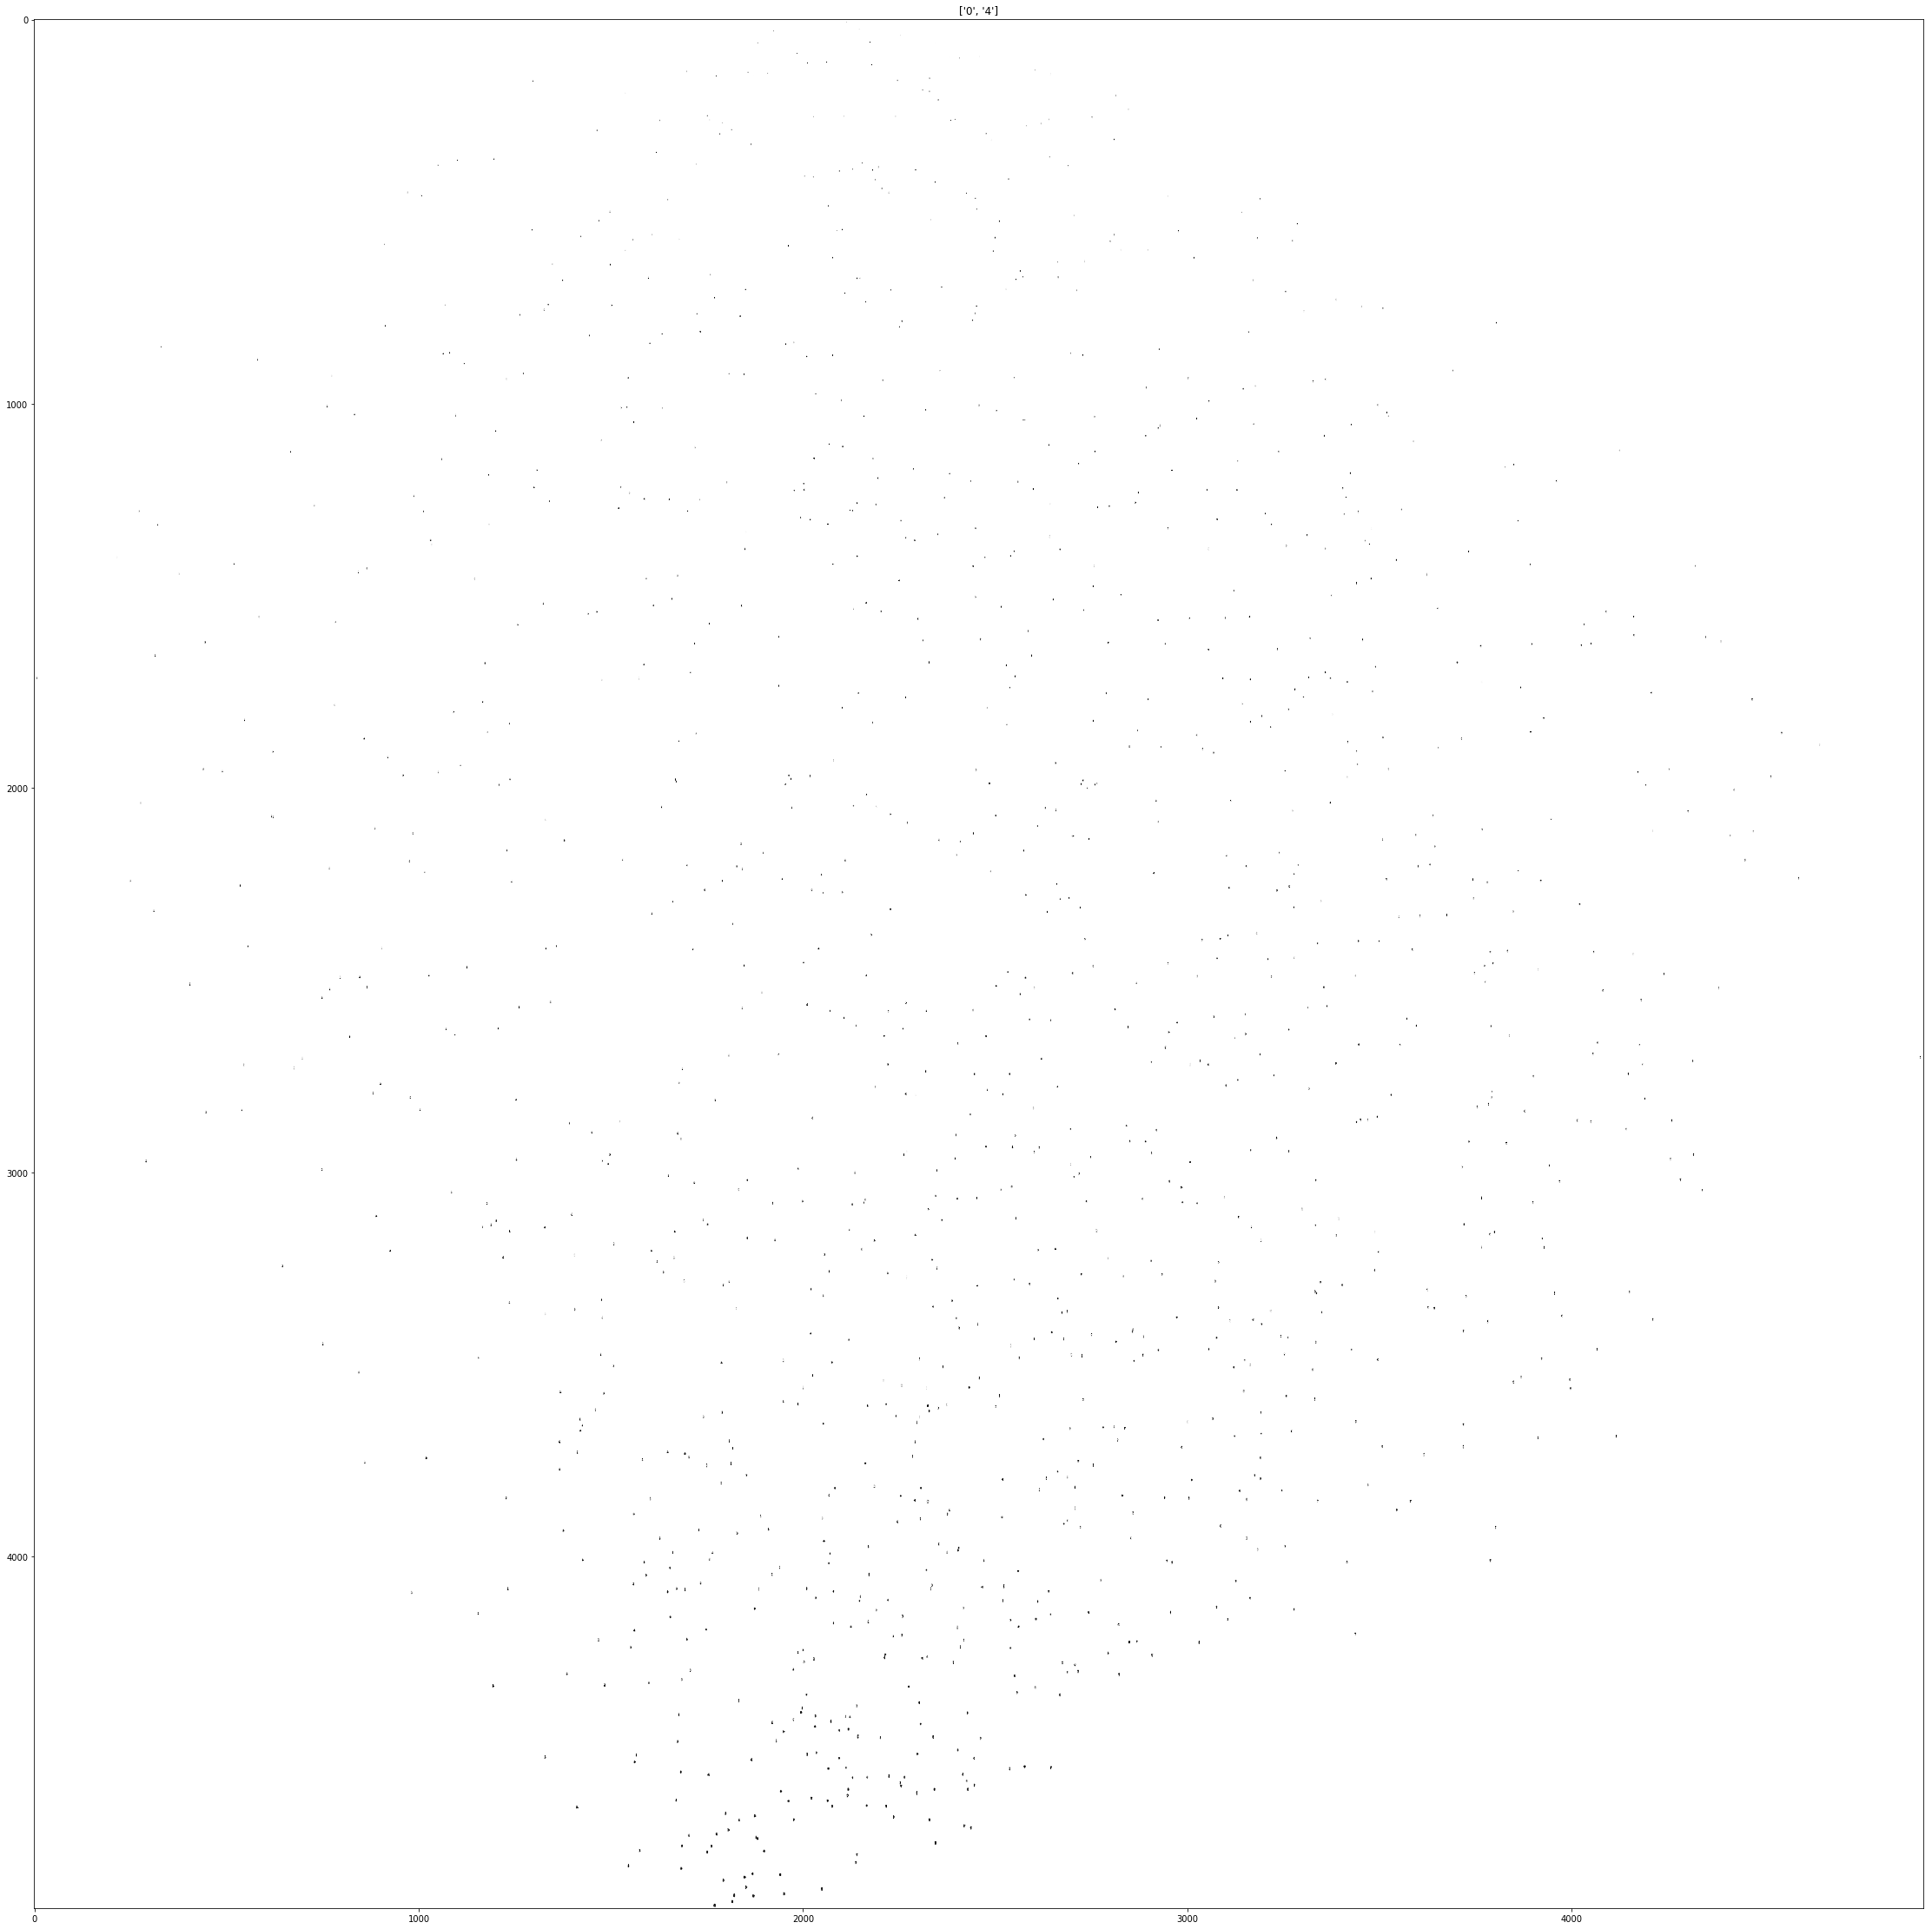

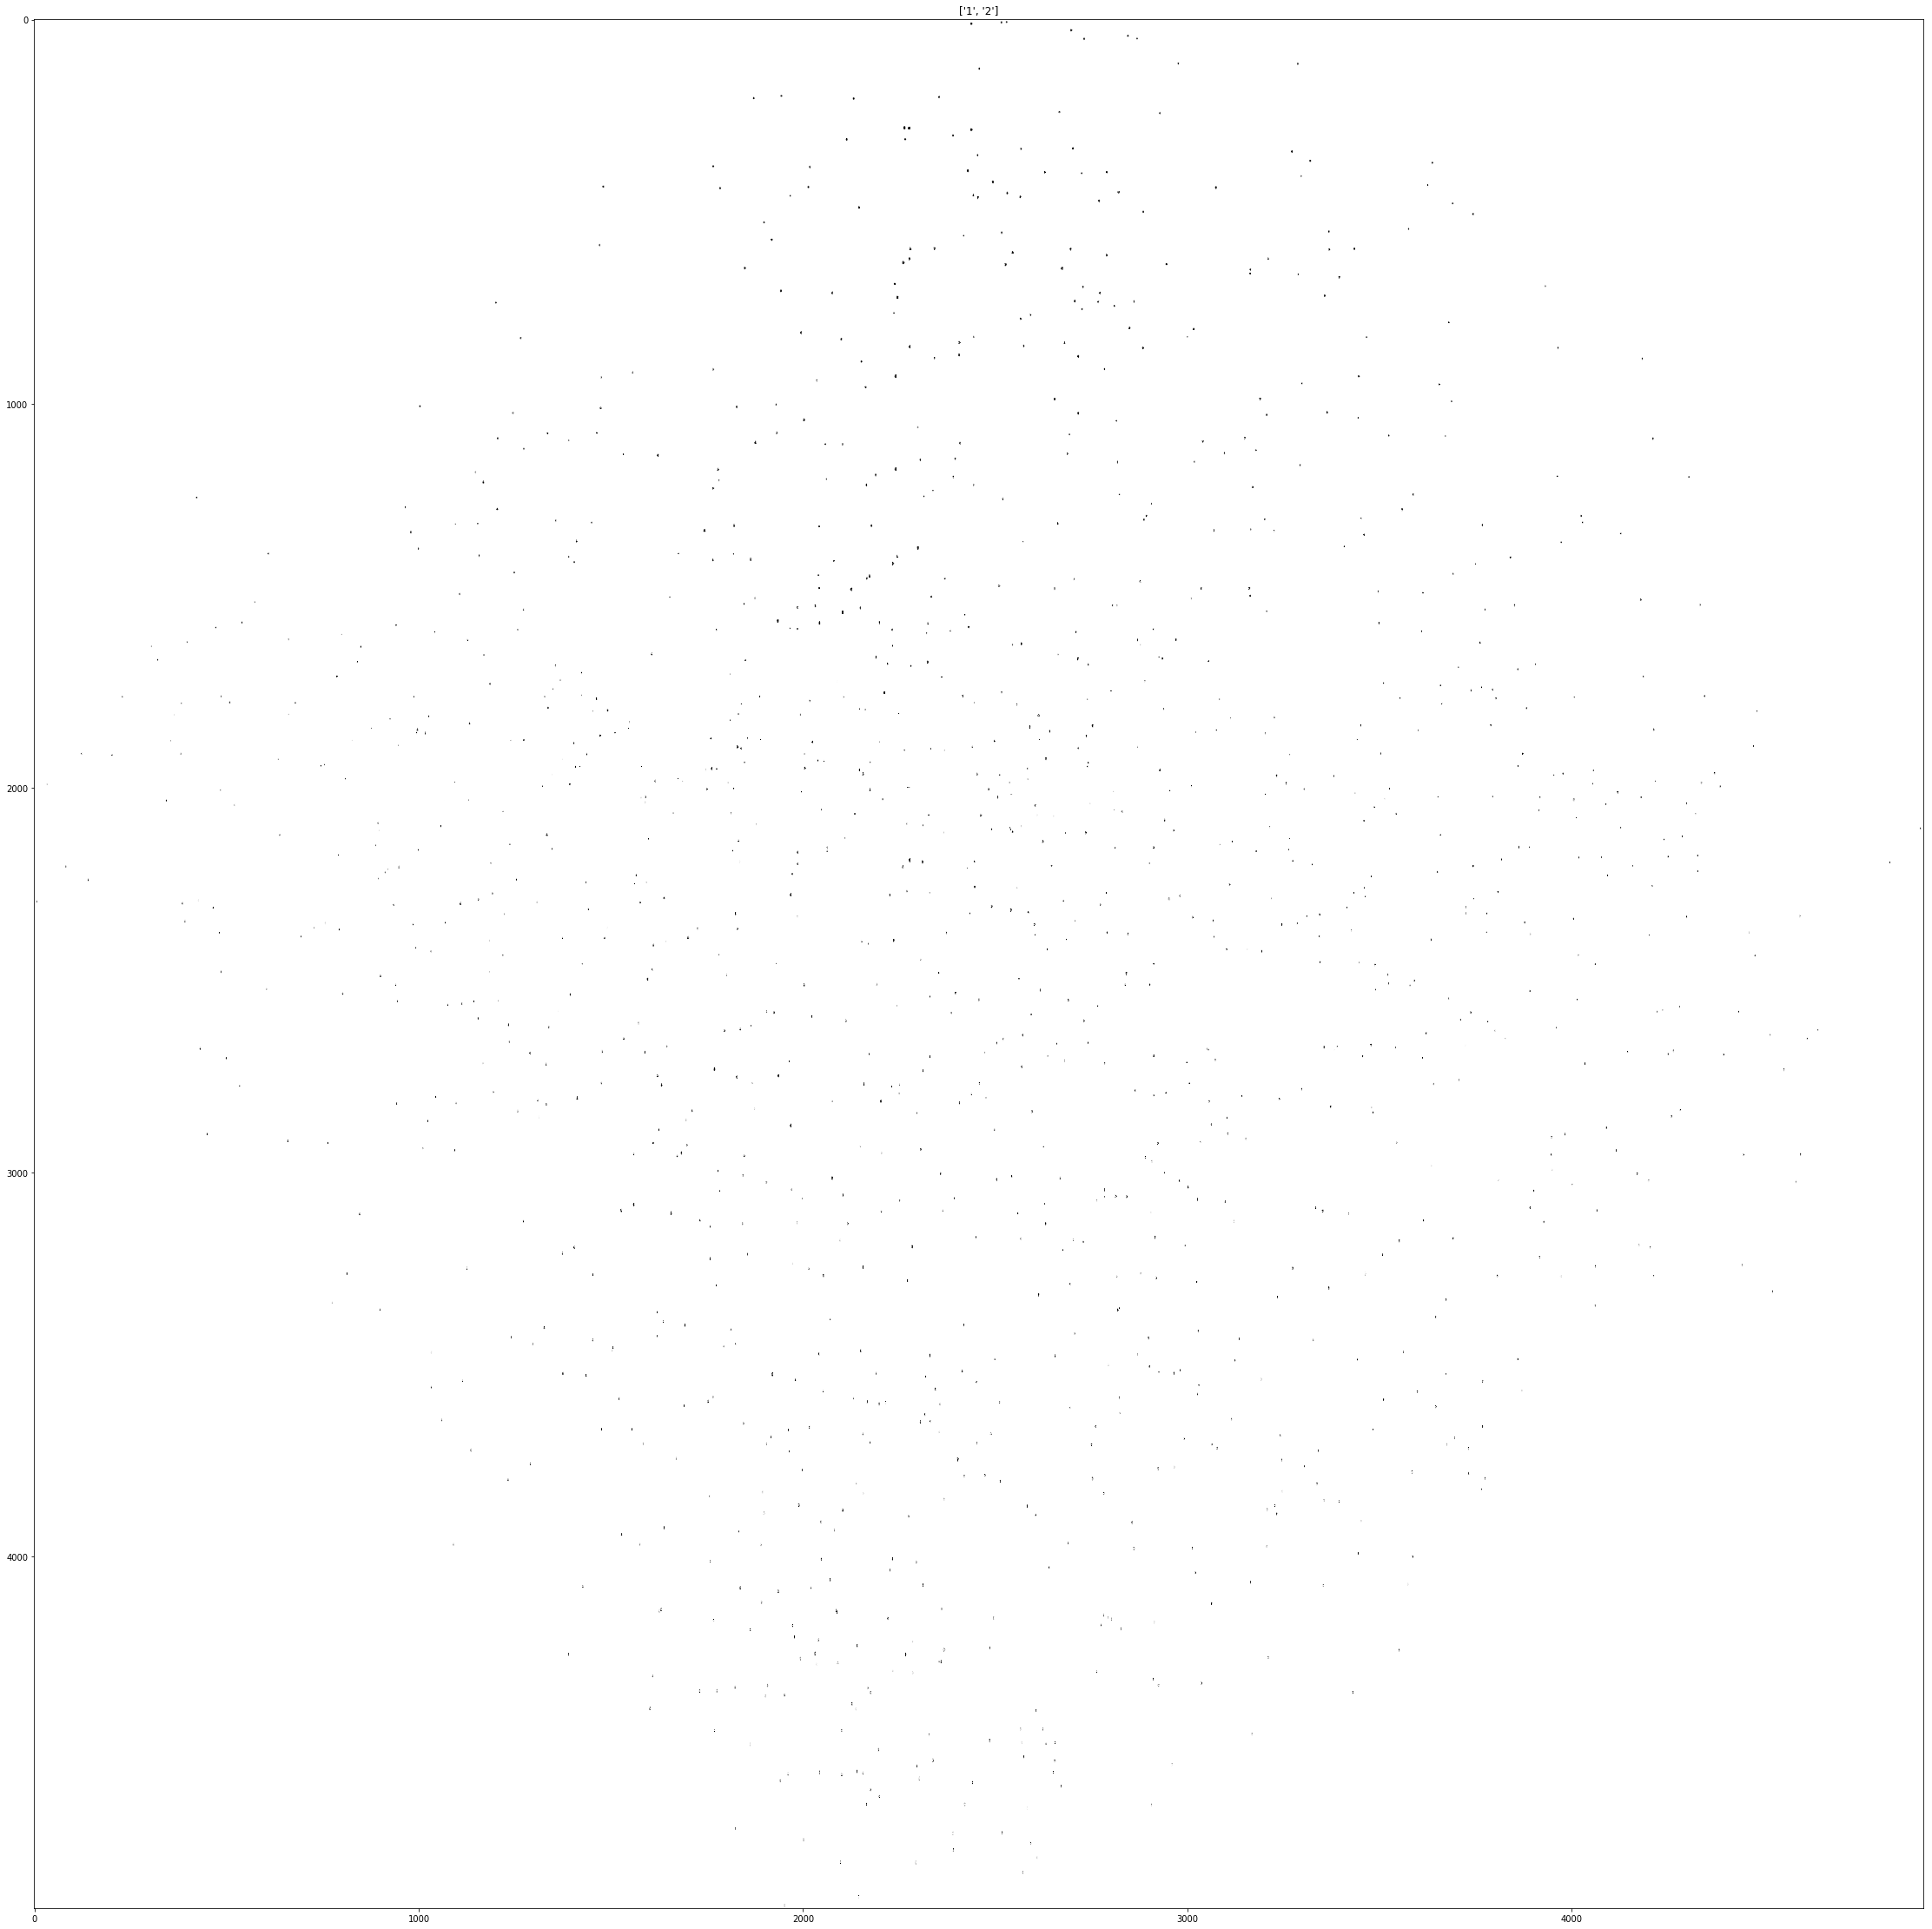

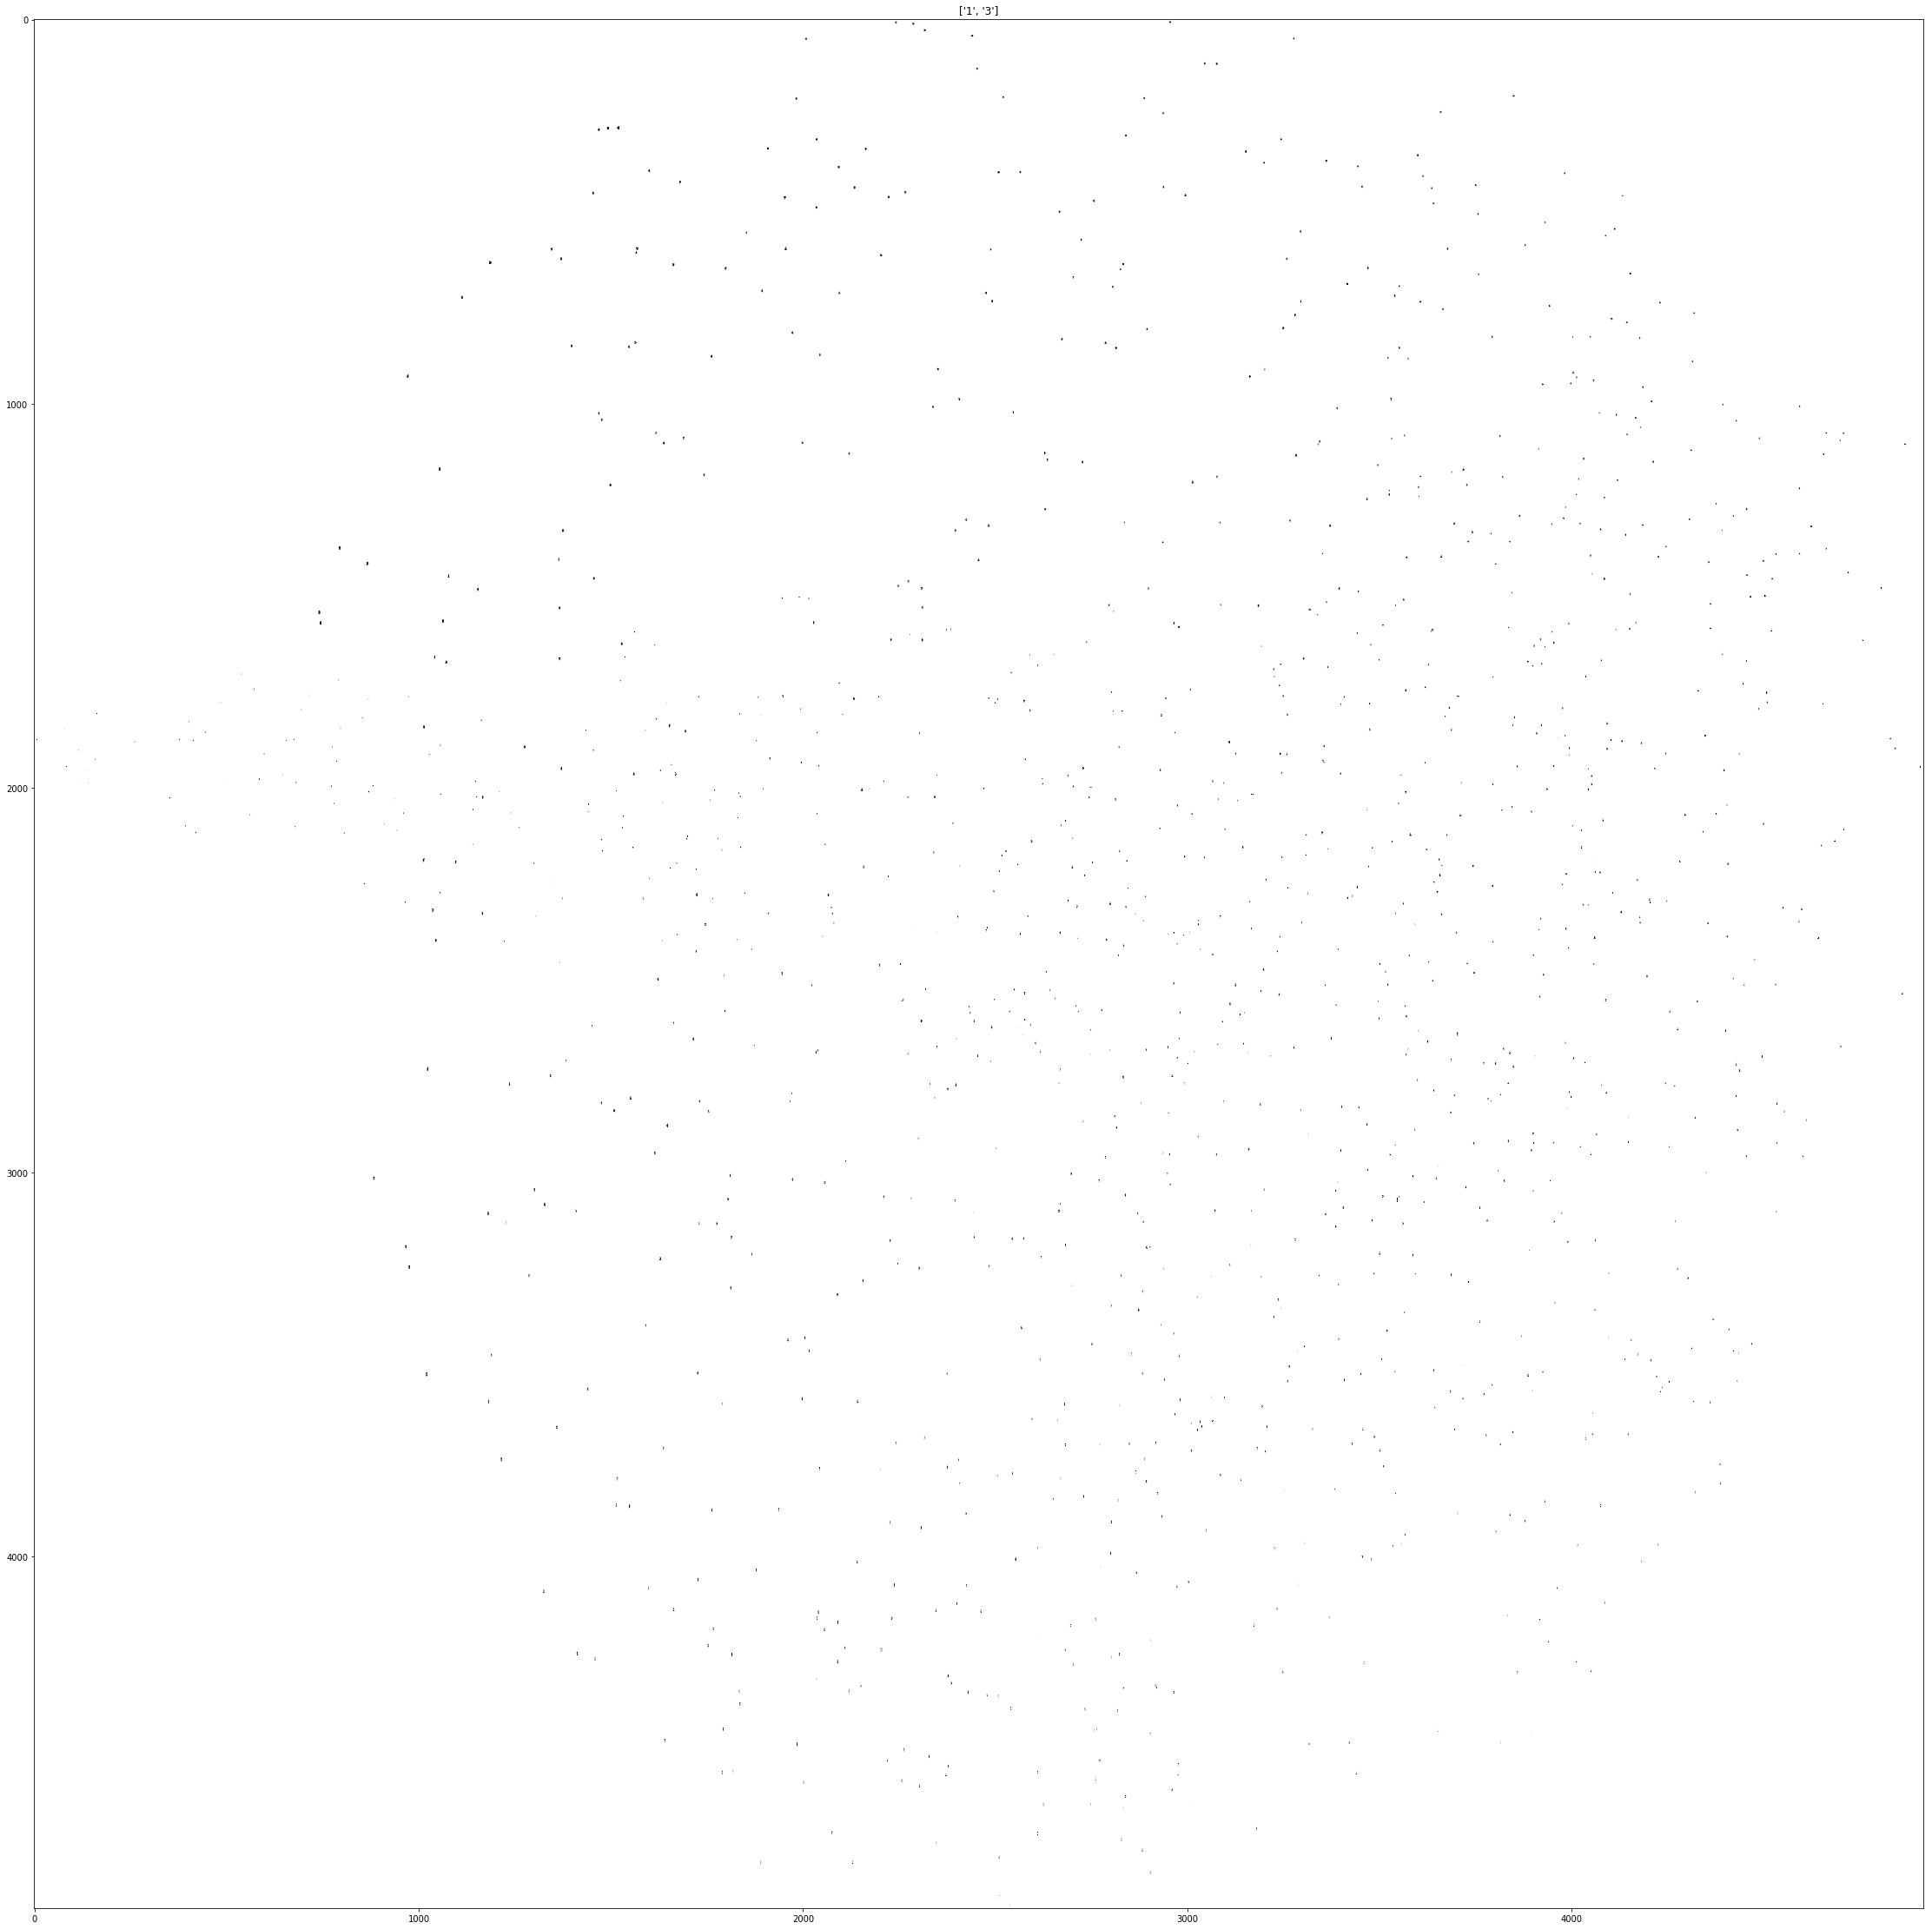

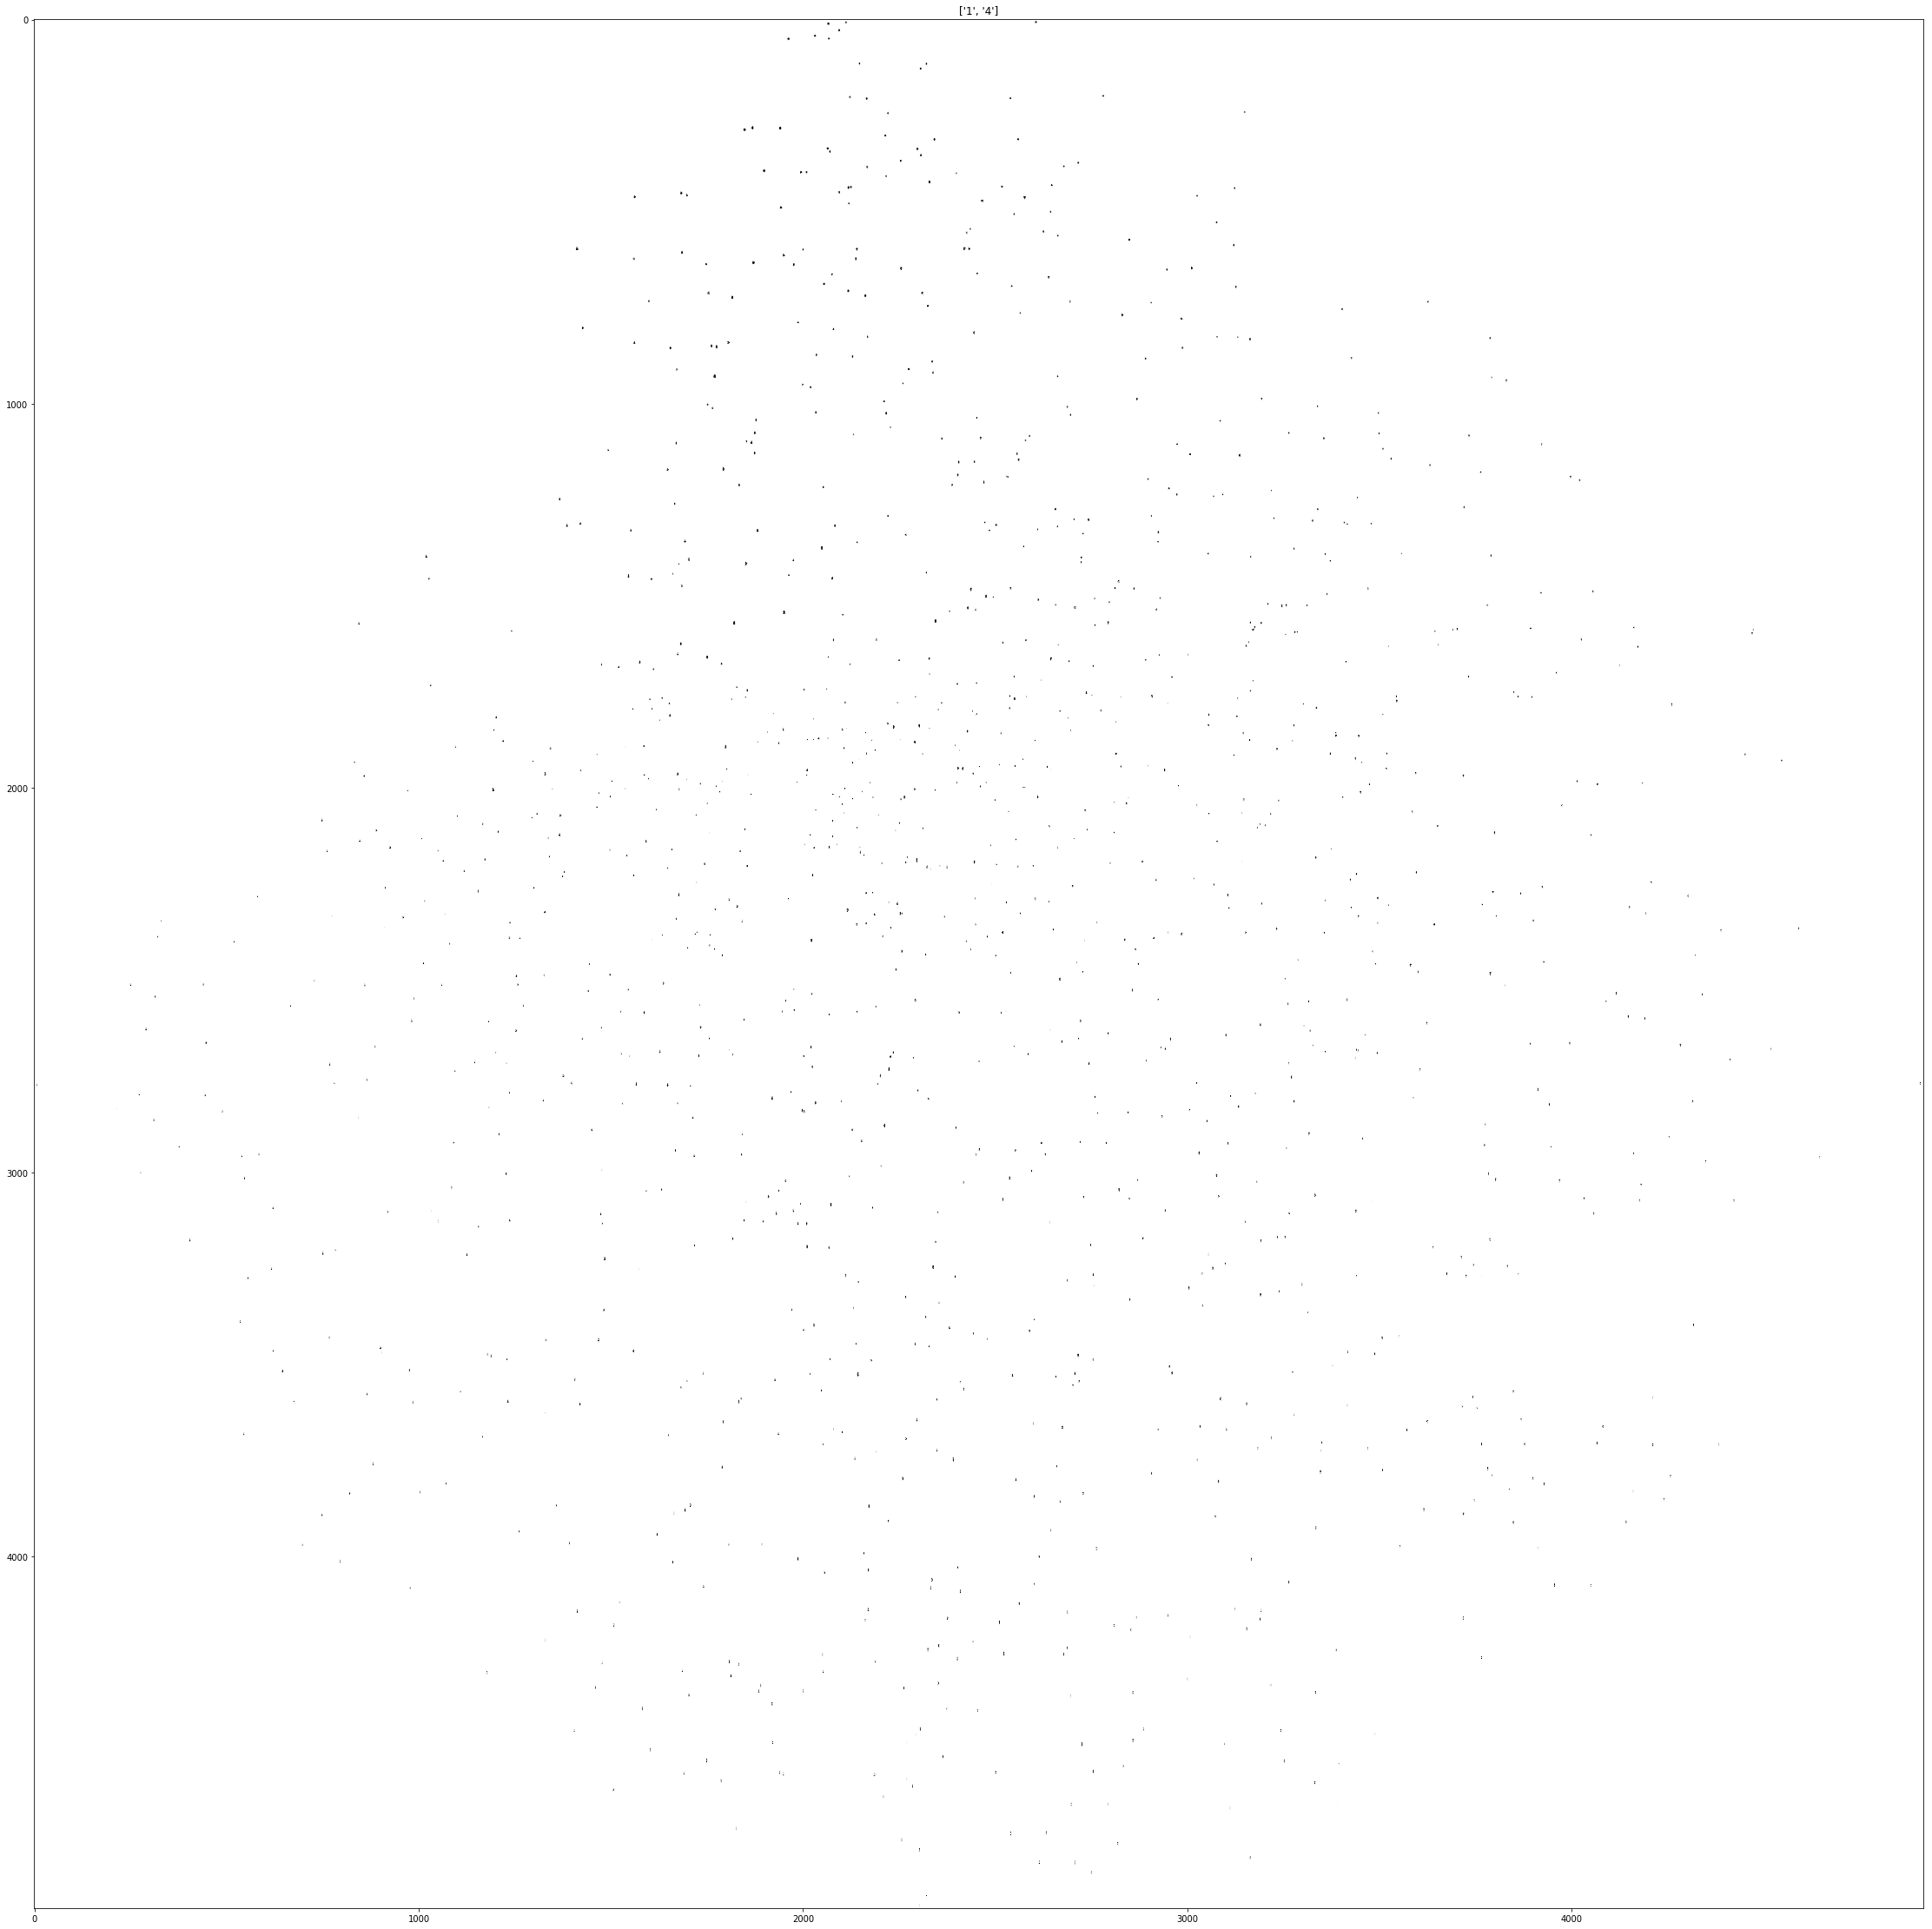

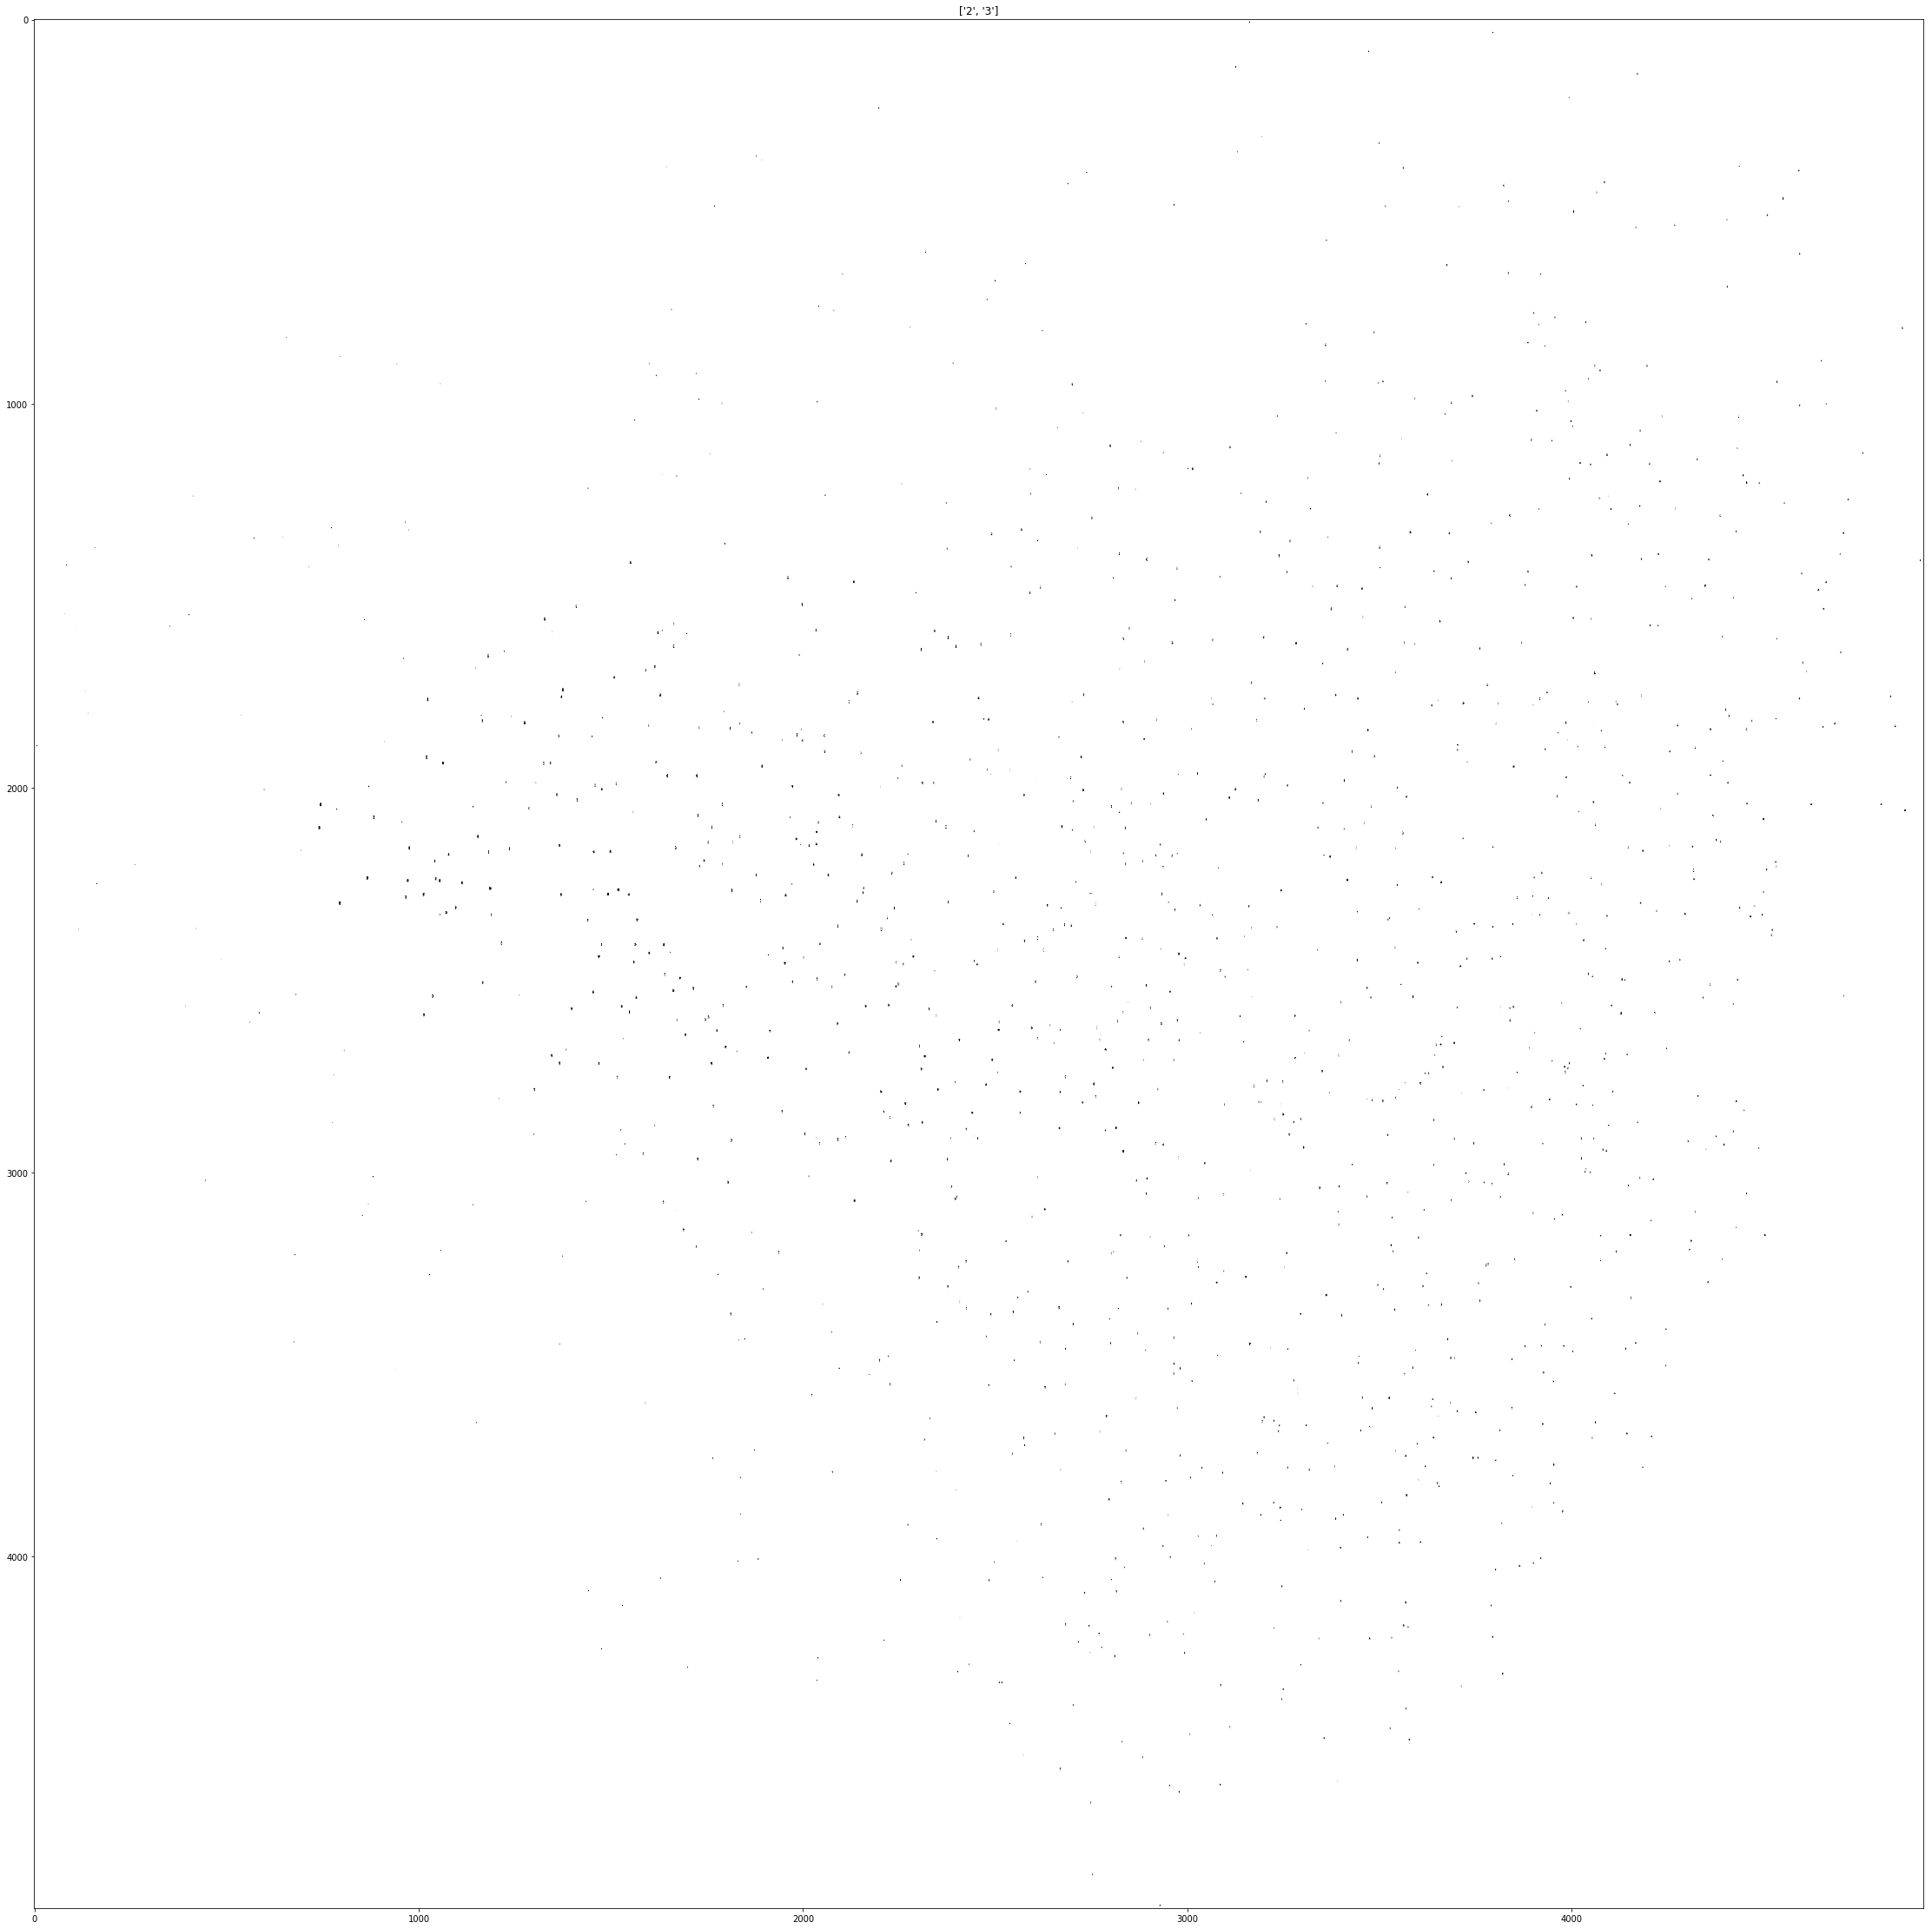

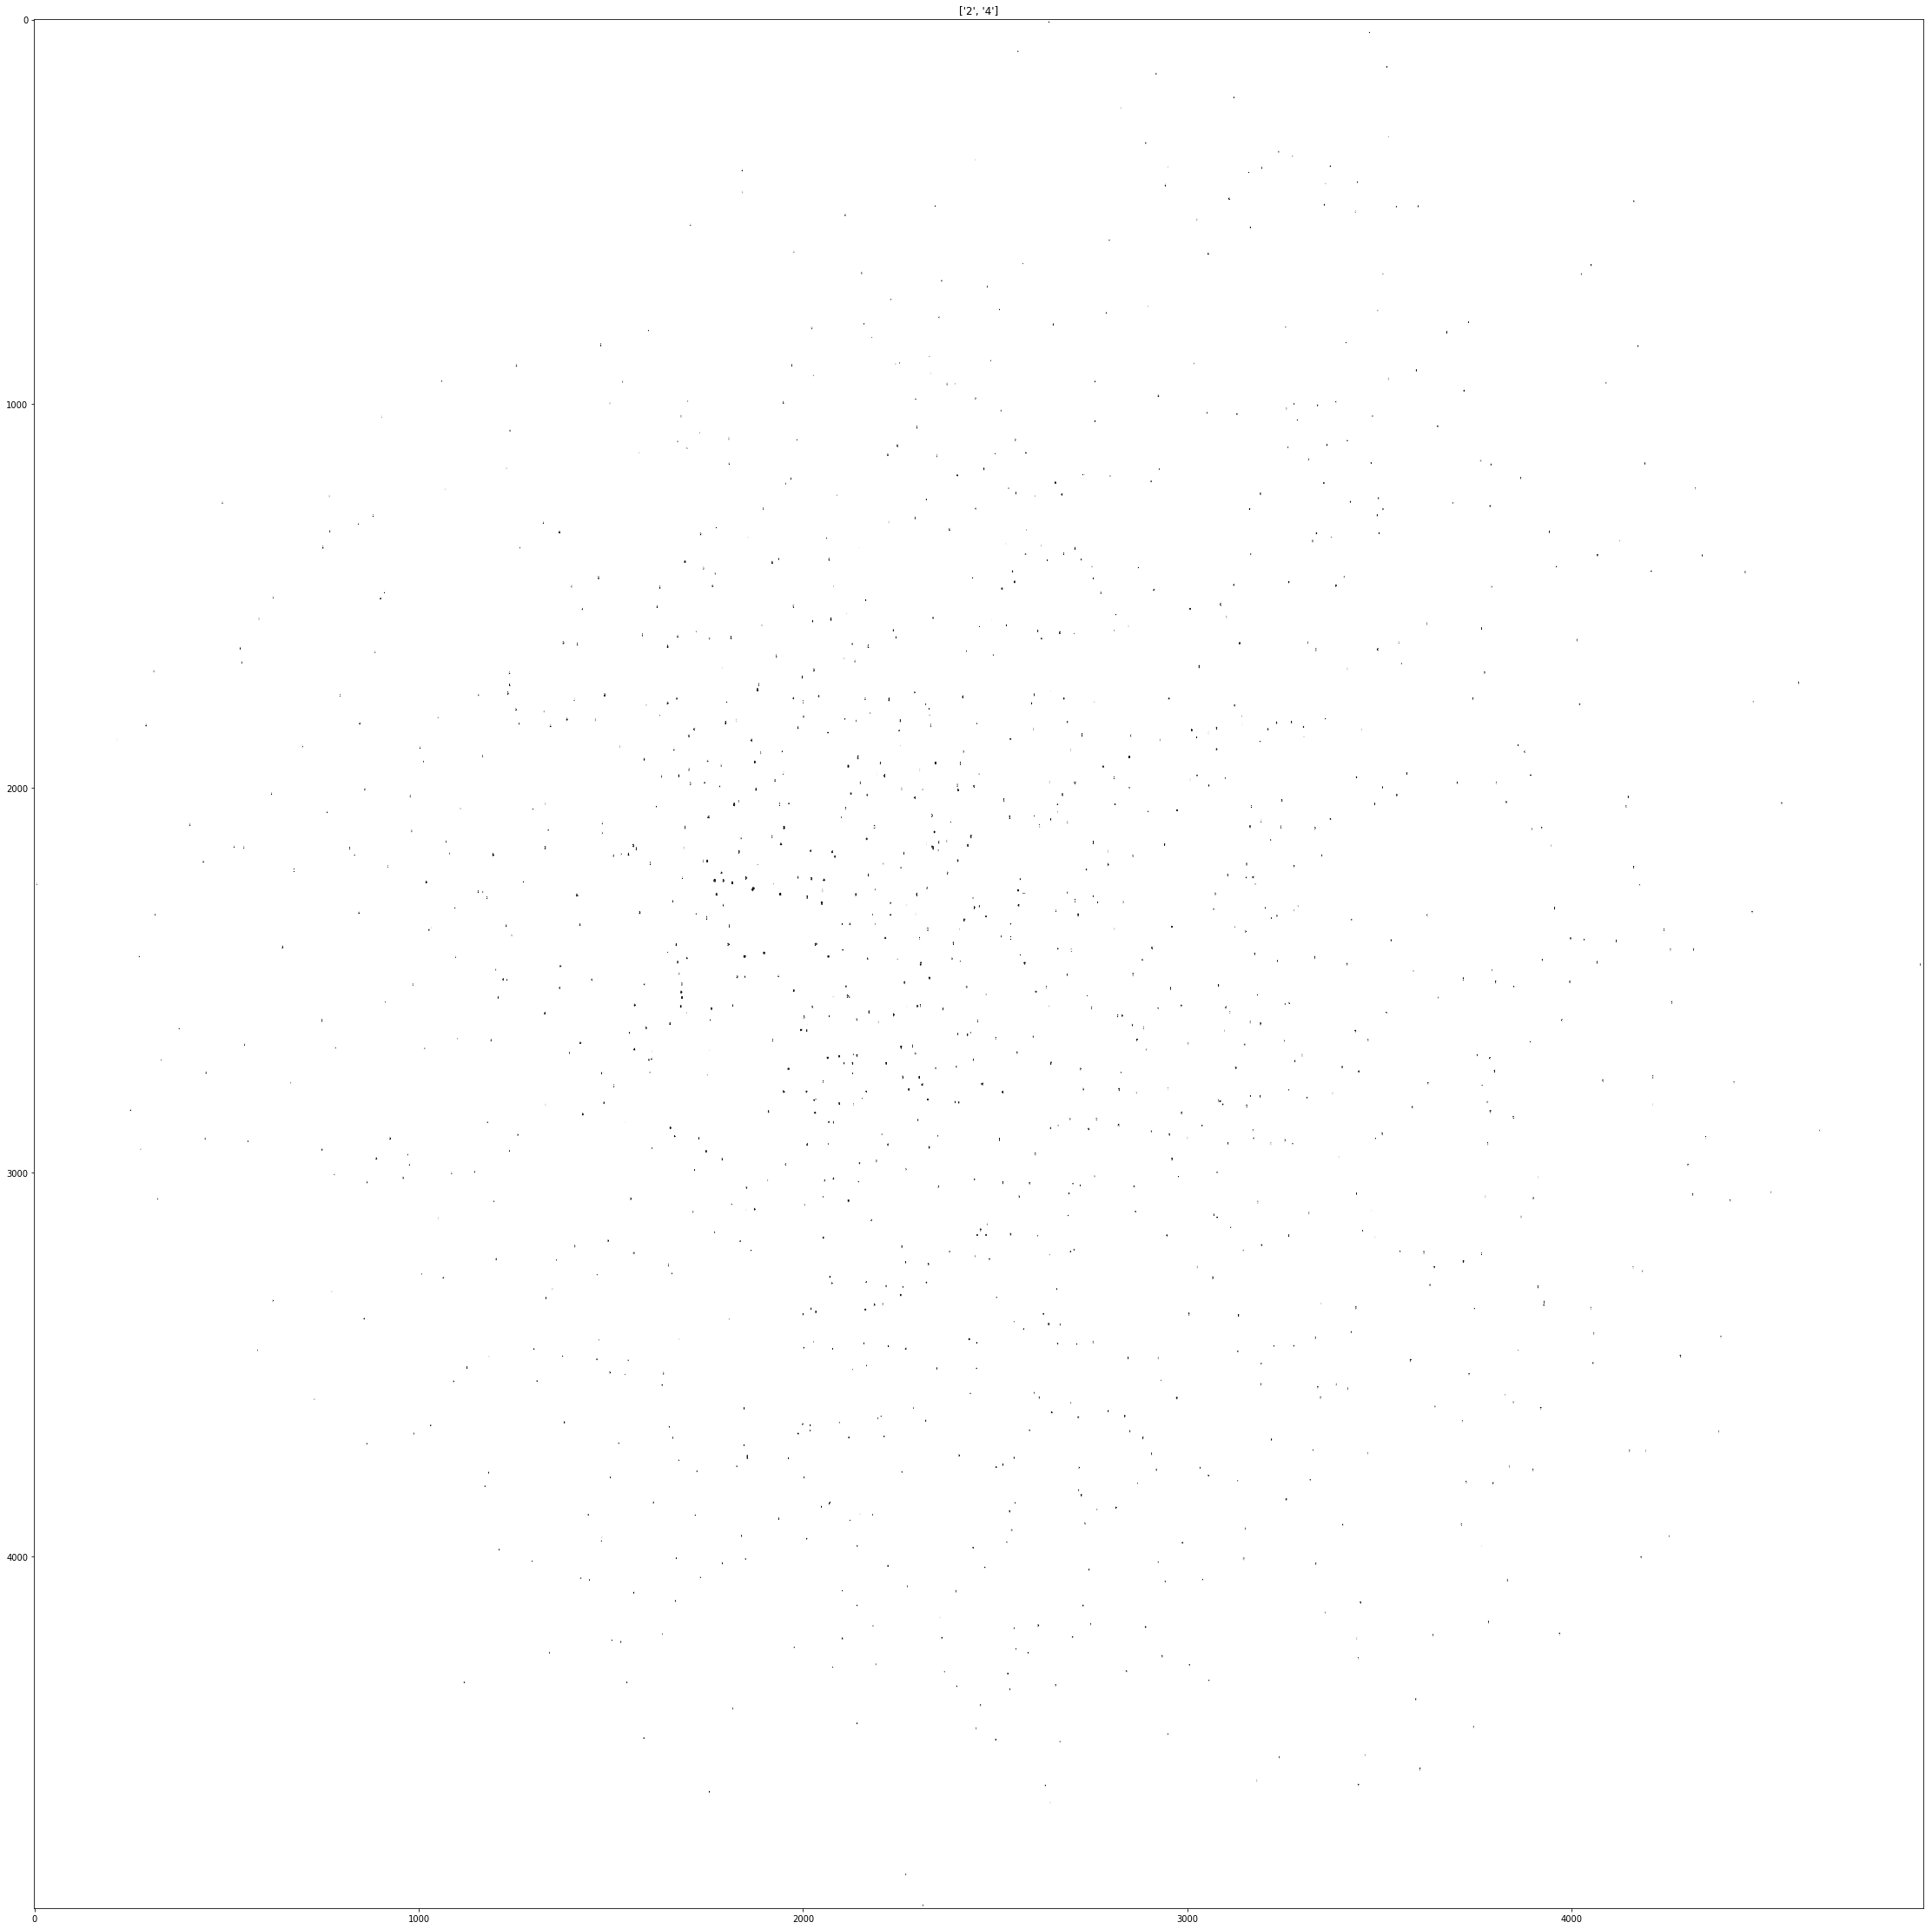

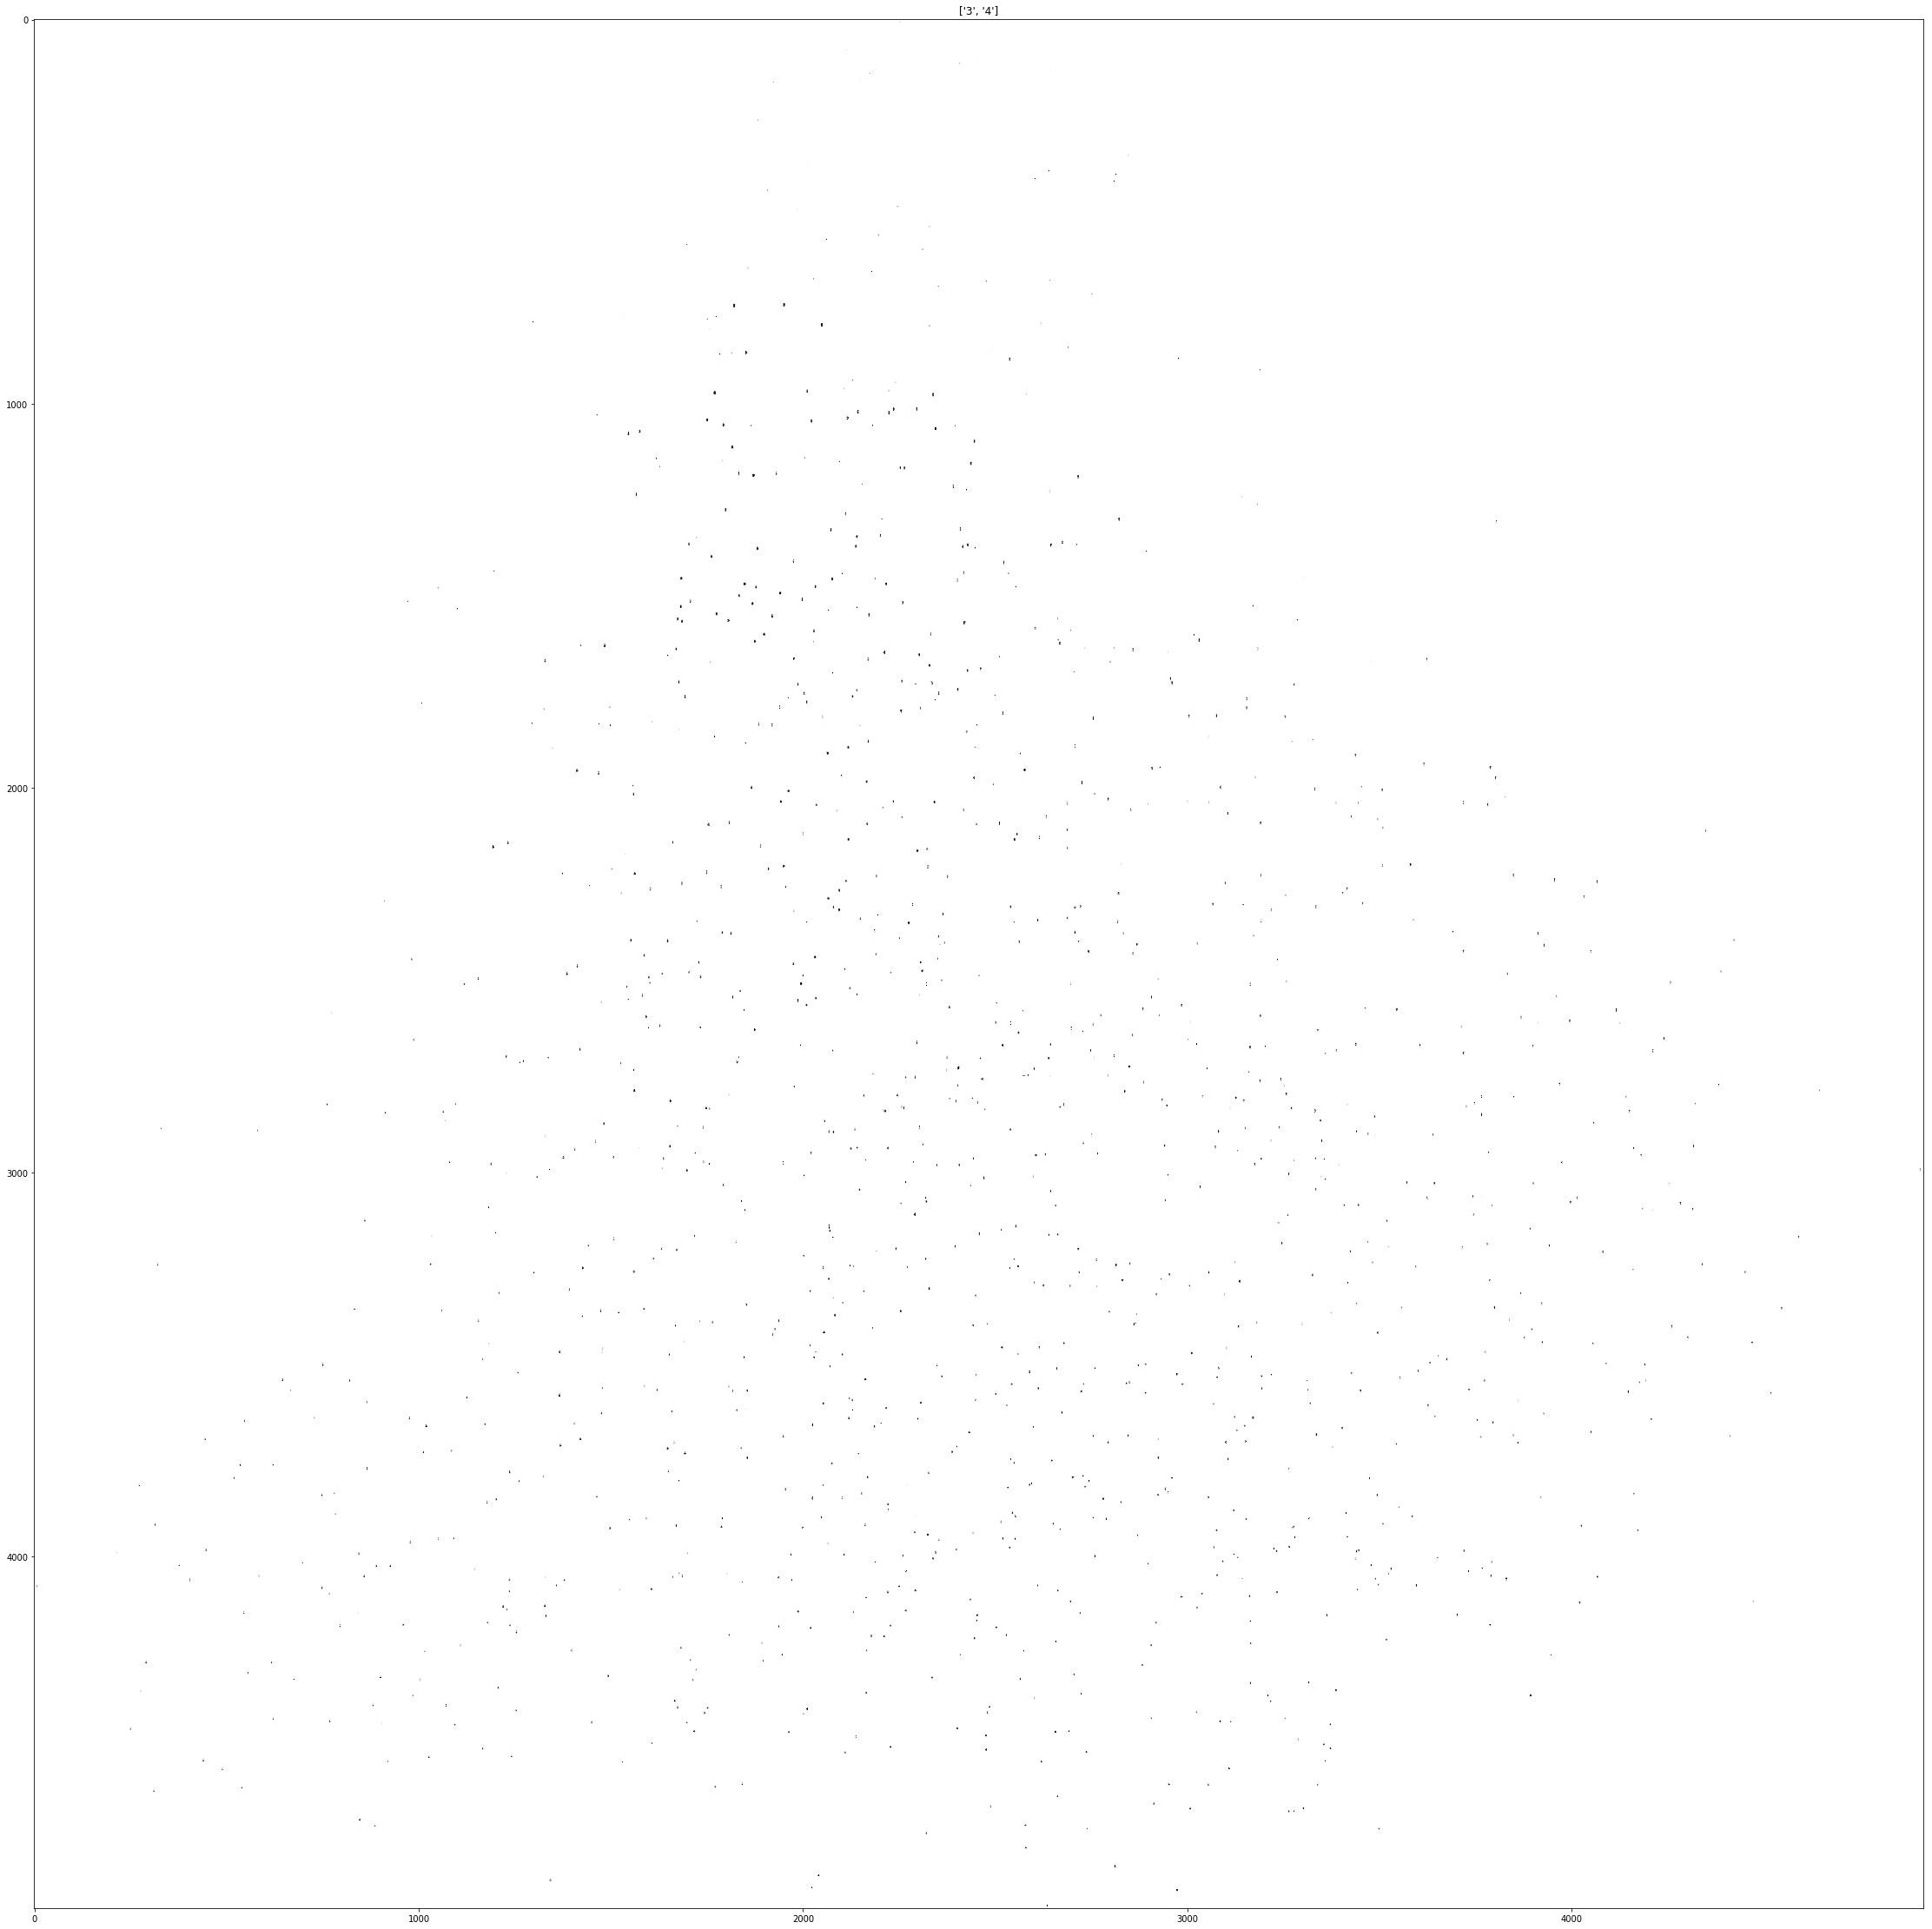

In [33]:
%%time
for i in range(5):
    for j in range(i+1,5):
        canvas = scatter_plots(data,dmap,d1=i,d2=j,canvas_sz=4900)
        figure(figsize=[40,40])
        imshow(canvas,cmap='gray')
        title([str(i),str(j)])
        

In [21]:
%%time
mydmap = dm.DiffusionMap.from_sklearn(n_evecs=50, k=100, metric='precomputed',epsilon=2500, alpha=1.0, neighbor_params=neighbor_params)
dmap = mydmap.fit_transform(data)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [12]:
%%time
mydmap.transform(data[:2])

recomputing nearest neighbors
CPU times: user 147 ms, sys: 5.7 ms, total: 153 ms
Wall time: 152 ms


array([[ 2.75185903e+00, -8.87280793e-01, -1.48185980e+00,
        -1.73411970e+00,  2.97046735e+00, -8.46223615e-01,
        -1.35894197e+00,  1.20561889e-01, -2.04477480e+00,
        -1.22623488e+00, -1.36753545e-01, -5.05402654e-01,
        -2.80612912e-01, -8.18451467e-01,  4.35894160e-01,
         4.36452209e-01, -1.23209757e+00, -5.92094923e-01,
        -8.26415465e-02,  7.34395018e-01,  5.18320121e-02,
        -1.14972041e-01, -3.54571856e-01, -1.03474619e-01,
        -7.88818468e-01,  2.77264400e-01,  1.68638044e-01,
         1.55959846e-01, -4.35708841e-01, -6.84207300e-01,
        -7.34234345e-01,  1.77230915e-01, -4.20104702e-01,
        -9.72499225e-01, -3.20018823e-01, -3.68567026e-02,
        -7.78924458e-02, -2.01430593e-02, -2.49659875e-01,
        -6.36126325e-02,  1.03492512e-02, -4.60974567e-02,
        -5.93590519e-02, -2.79197981e-01,  8.09155710e-02,
        -8.13133352e-02, -3.13785910e-01,  5.29143811e-01,
        -1.74988537e-01,  1.48049712e-01],
       [ 4.48

In [7]:
dmap

array([[ 2.96846635, -1.40503763, -2.24450003, ...,  2.83699106,
        -0.97838167,  0.94777655],
       [ 4.58955013, -0.76735846, -1.23777454, ...,  0.47991348,
        -0.30791832, -0.98541714],
       [ 4.24523639,  1.97275981, -2.77687974, ..., -0.53652368,
        -0.56257544, -2.3259923 ],
       ...,
       [ 6.33383791,  1.60117665, -3.88472472, ..., -0.23783145,
        -1.76581916,  0.48981456],
       [ 0.84960756,  2.15236766, -3.32883093, ..., -0.71271795,
        -1.02271721,  2.12158956],
       [-4.99518433, -2.59085763, -1.93420635, ...,  0.04044226,
         1.5449989 ,  0.38169477]])

In [8]:
size =15
Reps_mat = pack_pics(data)
data1D=np.concatenate([x.reshape([1,size*size]) for x in Reps_mat])

In [11]:
data1D.shape

(1286, 225)

In [9]:
from pydiffmap import diffusion_map as dm


In [10]:
%%time
mydmap = dm.DiffusionMap.from_sklearn(n_evecs=50, k=100,epsilon=2500, alpha=1.0, neighbor_params=neighbor_params)
dmap = mydmap.fit_transform(data1D)


CPU times: user 267 ms, sys: 108 ms, total: 375 ms
Wall time: 1.56 s


In [11]:
mydmap.transform(data1D[0,:])


array([[ 2.7529939 , -0.88828807, -1.49136952, -1.71695036,  2.9746356 ,
        -0.84209787, -1.35932273,  0.12529961, -2.0481084 , -1.22342914,
        -0.13863292, -0.50573207, -0.28386162, -0.81802771,  0.42152057,
         0.44006108, -1.2254076 , -0.60435103, -0.07798089,  0.74562513,
         0.04653197, -0.11078561, -0.35120974, -0.10300068, -0.79308862,
         0.27705193,  0.1881393 ,  0.16081841, -0.42979252, -0.68699342,
        -0.69608071,  0.22077749, -0.41923827, -0.99858174, -0.29544218,
        -0.02614225,  0.07082413, -0.02680397, -0.25400047, -0.05594391,
         0.00530732, -0.05579199, -0.17943677,  0.22405412,  0.0667078 ,
        -0.11602243, -0.35324994,  0.50965392, -0.14617815,  0.15625087]])

In [29]:
data1D.shape

(1286, 225)

In [12]:
dmap


array([[ 2.97024321, -1.40621738, -2.25768815, ...,  2.75060209,
        -0.84297734,  0.99658938],
       [ 4.59007066, -0.7641156 , -1.23084554, ...,  0.5357474 ,
        -0.4293712 , -0.93942591],
       [ 4.24504617,  1.97555326, -2.77602111, ..., -0.66923043,
        -0.83360834, -2.26537888],
       ...,
       [ 6.33354272,  1.60475728, -3.8677386 , ..., -0.30857937,
        -1.64984785,  0.6903832 ],
       [ 0.8477371 ,  2.15213188, -3.35533349, ..., -0.73869169,
        -0.70090445,  2.26245081],
       [-4.99393348, -2.58990249, -1.91756409, ...,  0.08996005,
         1.62028117,  0.22222964]])

In [76]:
import sklearn
distances = sklearn.metrics.pairwise_distances(data1D)

In [80]:
np.sqrt(sum((data1D[0]-data1D[1])**2))

5.03

In [88]:
dist2(data1D[0].reshape([size,-1]),data[1].reshape([size,-1]))

5.033572351200182

In [83]:
dist2(data[0],data[3])

6.708203932499369

In [85]:
distances[0,:10]

array([0.        , 5.03310531, 8.37625673, 6.59952333, 7.74094114,
       5.79445806, 6.31548877, 5.53317277, 5.66625359, 6.56718843])